In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
messages = ""
try:
    with open(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_groupo.txt", 'r') as file:
        for line in file:
            print(line.strip())
            message = line.strip().replace('\u200e','')
            messages+=message
except FileNotFoundError:
    print("The file does not exist")
except Exception as e:
    print(f"An error occurred: {e}")

[31/10/24, 8:27:43 PM] SHP 🐭: ‎SHP 🐭 created group “nuclear bomb🤡”
[31/10/24, 8:27:58 PM] SHP 🐭: aprm ah vendam na dissolve paniklam idha😂
[31/10/24, 8:28:04 PM] Cyber 🥚🐛🔥: Adangomala 😂
[31/10/24, 8:28:14 PM] SHP 🐭: sambavam pandra varikum updates kuduka irukatum
[31/10/24, 8:29:10 PM] SHP 🐭: so that rendu perukum thani thaniya convey pandra mari varadhu🌚 ~i am basically lazy that is~
[31/10/24, 8:30:19 PM] Cyber 🥚🐛🔥: Monday avaluku pesanumam oru Mari pesurena
‎[31/10/24, 8:30:54 PM] Akhshan 😁: ‎sticker omitted
[31/10/24, 8:31:16 PM] Cyber 🥚🐛🔥: Virundhu parimariralam akhshan
[31/10/24, 8:31:20 PM] SHP 🐭: rytuh
[31/10/24, 8:31:34 PM] SHP 🐭: she chose to do this
[31/10/24, 8:31:40 PM] Cyber 🥚🐛🔥: S
[31/10/24, 8:31:57 PM] Cyber 🥚🐛🔥: Parunga pechi divert aga kudadhu
[31/10/24, 8:32:03 PM] Cyber 🥚🐛🔥: Monday
[31/10/24, 8:32:03 PM] SHP 🐭: yes
[31/10/24, 8:32:09 PM] SHP 🐭: content solirunga
[31/10/24, 8:32:14 PM] SHP 🐭: I ll ensure it doesn't get diverted
[31/10/24, 8:32:17 PM] Cyber 🥚🐛🔥: Done


In [4]:
messages

'[31/10/24, 8:27:43\u202fPM] SHP 🐭: SHP 🐭 created group “nuclear bomb🤡”[31/10/24, 8:27:58\u202fPM] SHP 🐭: aprm ah vendam na dissolve paniklam idha😂[31/10/24, 8:28:04\u202fPM] Cyber 🥚🐛🔥: Adangomala 😂[31/10/24, 8:28:14\u202fPM] SHP 🐭: sambavam pandra varikum updates kuduka irukatum[31/10/24, 8:29:10\u202fPM] SHP 🐭: so that rendu perukum thani thaniya convey pandra mari varadhu🌚 ~i am basically lazy that is~[31/10/24, 8:30:19\u202fPM] Cyber 🥚🐛🔥: Monday avaluku pesanumam oru Mari pesurena[31/10/24, 8:30:54\u202fPM] Akhshan 😁: sticker omitted[31/10/24, 8:31:16\u202fPM] Cyber 🥚🐛🔥: Virundhu parimariralam akhshan[31/10/24, 8:31:20\u202fPM] SHP 🐭: rytuh[31/10/24, 8:31:34\u202fPM] SHP 🐭: she chose to do this[31/10/24, 8:31:40\u202fPM] Cyber 🥚🐛🔥: S[31/10/24, 8:31:57\u202fPM] Cyber 🥚🐛🔥: Parunga pechi divert aga kudadhu[31/10/24, 8:32:03\u202fPM] Cyber 🥚🐛🔥: Monday[31/10/24, 8:32:03\u202fPM] SHP 🐭: yes[31/10/24, 8:32:09\u202fPM] SHP 🐭: content solirunga[31/10/24, 8:32:14\u202fPM] SHP 🐭: I ll ensure 

In [5]:
import re
import pandas as pd

def parse_chat_log(chat_log):
    pattern = r"\[(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}:\d{2})\u202f([AP]M)\] ?(.+?)? ?: ?(.+?)(?=\[|$)"
    matches = re.findall(pattern, chat_log, flags=re.DOTALL)
    
    parsed_log = []
    for match in matches:
        date_time_str = f"{match[0]} {match[1]} {match[2]}"
        date_time = pd.to_datetime(date_time_str, format='%d/%m/%y %I:%M:%S %p')
        message = match[4].strip().lower()
        
        if "image omitted" in message:
            message_type = "Image"
            message = ""
        elif "video omitted" in message:
            message_type = "Video"
            message = ""
        elif "sticker omitted" in message:
            message_type = "Sticker"
            message = ""
        elif "audio omitted" in message:
            message_type = "Audio"
            message = ""
        elif "document omitted" in message:
            message_type = "Document"
            message = ""
        elif "contact omitted" in message:
            message_type = "Contact"
            message = ""
        elif "location shared" in message:
            message_type = "Location"
            message = ""
        elif "missed voice call, tap to call back" in message:
            message_type = "Voice Call"
            message = "Missed"
        elif "voice call," in message:
            match_duration = re.search(r"(\d+:\d+)", message)
            if match_duration:
                message_type = "Voice Call"
                message = match_duration.group(0)
            else:
                message_type = "Voice Call"
                message = message.split(',')[-1]
        elif "missed video call, tap to call back" in message:
            message_type = "Video Call"
            message = "Missed"
        elif "video call," in message:
            match_duration = re.search(r"(\d+:\d+)", message)
            if match_duration:
                message_type = "Video Call"
                message = match_duration.group(0)
            else:
                message_type = "Video Call"
                message = message.split(',')[-1]
        else:
            message_type = "Text"
        
        parsed_log.append({
            "date_time": date_time,
            "user": match[3],
            "message_type": message_type,
            "message": message
        })
    
    return pd.DataFrame(parsed_log)

df = parse_chat_log(messages)
df.to_csv('chat_log.csv', index=False)

print(df.head())

            date_time       user message_type  \
0 2024-10-31 20:27:43      SHP 🐭         Text   
1 2024-10-31 20:27:58      SHP 🐭         Text   
2 2024-10-31 20:28:04  Cyber 🥚🐛🔥         Text   
3 2024-10-31 20:28:14      SHP 🐭         Text   
4 2024-10-31 20:29:10      SHP 🐭         Text   

                                             message  
0                shp 🐭 created group “nuclear bomb🤡”  
1          aprm ah vendam na dissolve paniklam idha😂  
2                                       adangomala 😂  
3    sambavam pandra varikum updates kuduka irukatum  
4  so that rendu perukum thani thaniya convey pan...  


In [6]:
df['user'].unique()

array(['SHP 🐭', 'Cyber 🥚🐛🔥', 'Akhshan 😁', 'Migga 🤓', 'JuruThee 🙇\u200d♂️'],
      dtype=object)

In [7]:
from utils.parser import parse_chat_log
from utils.message_reader import reader

In [8]:
message = reader(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_groupo.txt")

In [9]:
parse_chat_log(message)

date_time       user message_type  \
0    2024-10-31 20:27:43      SHP 🐭         Text   
1    2024-10-31 20:27:58      SHP 🐭         Text   
2    2024-10-31 20:28:04  Cyber 🥚🐛🔥         Text   
3    2024-10-31 20:28:14      SHP 🐭         Text   
4    2024-10-31 20:29:10      SHP 🐭         Text   
...                  ...        ...          ...   
9766 2025-06-10 10:36:38      SHP 🐭         Text   
9767 2025-06-10 11:31:19    Migga 🤓         Text   
9768 2025-06-10 11:31:56  Cyber 🥚🐛🔥      Sticker   
9769 2025-06-10 11:44:17      SHP 🐭         Text   
9770 2025-06-10 11:55:17  Cyber 🥚🐛🔥         Text   

                                                message  
0                   shp 🐭 created group “nuclear bomb🤡”  
1             aprm ah vendam na dissolve paniklam idha😂  
2                                          adangomala 😂  
3       sambavam pandra varikum updates kuduka irukatum  
4     so that rendu perukum thani thaniya convey pan...  
...                                                 ...  
9766                                                😂😂😂  
9767  rombha naal kalachi loop la kekardhu soul ful ...  
9768                                                     
9769                                          ewwwww tf  
9770                                                 😂😂  

[9771 rows x 4 columns]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the chat log data
df['date_time'] = pd.to_datetime(df['date_time'])

# Per-Participant Stats
participant_stats = df['user'].value_counts()
print(participant_stats)

# Messages by Weekday
df['weekday'] = df['date_time'].dt.day_name()
weekday_counts = df['weekday'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Messages by Weekday')
plt.show()

# Hourly Activity per Sender
df['hour'] = df['date_time'].dt.hour
hourly_activity = df.groupby(['user', 'hour']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='count', hue='user', data=hourly_activity)
plt.title('Hourly Activity per Sender')
plt.show()

# Message distribution over time
df['date'] = df['date_time'].dt.date
message_distribution = df.groupby('date').size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='count', data=message_distribution)
plt.title('Message distribution over time')
plt.show()

# Daily participation of each member
daily_participation = df.groupby(['user', 'date']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='count', hue='user', data=daily_participation)
plt.title('Daily participation of each member')
plt.show()

# Burst detection
# Burst detection
df.set_index('date_time', inplace=True)
df['rolling_count'] = df.groupby('user').rolling('1D').count()['user']
df.reset_index(inplace=True)
burst_threshold = df['rolling_count'].mean() + 2*df['rolling_count'].std()
bursts = df[df['rolling_count'] > burst_threshold]
print("Bursts:")
print(bursts)

# Most active hours and days
most_active_hours = df['hour'].value_counts().index[0]
most_active_days = df['weekday'].value_counts().index[0]
print(f'Most active hour: {most_active_hours}')
print(f'Most active day: {most_active_days}')

# Heatmap of Daily Activity by Participant
daily_activity_heatmap = df.groupby(['user', 'hour']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(daily_activity_heatmap, cmap='Blues')
plt.title('Heatmap of Daily Activity by Participant')
plt.show()

# Daily Activity by Participant
daily_activity = df.groupby(['user', 'date']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='count', hue='user', data=daily_activity)
plt.title('Daily Activity by Participant')
plt.show()

# Average message size
df['message_length'] = df['message'].apply(len)
average_message_size = df.groupby('user')['message_length'].mean()
print(average_message_size)

KeyError: 'date_time'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv")

# Convert date_time to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Basic cleanup
df['user'] = df['user'].astype(str)
df['message'] = df['message'].astype(str)


In [ ]:
# Message count
user_msg_count = df['user'].value_counts()

# Total words per user
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
user_word_count = df.groupby('user')['word_count'].sum()

# Average words per message
user_avg_words = df.groupby('user')['word_count'].mean()


In [ ]:
user_word_count,user_avg_words

(user
 Akhshan 😁        10194
 Cyber 🥚🐛🔥         5537
 JuruThee 🙇‍♂️     5954
 Migga 🤓          12181
 SHP 🐭             9985
 Name: word_count, dtype: int64,
 user
 Akhshan 😁        3.974269
 Cyber 🥚🐛🔥        4.285604
 JuruThee 🙇‍♂️    7.062871
 Migga 🤓          5.514260
 SHP 🐭            3.488819
 Name: word_count, dtype: float64)

In [ ]:
# Add time features
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Messages per day
daily_msgs = df.groupby(['date','user']).size()

# Messages by hour
hourly_msgs = df.groupby(['hour','user']).size()

# Messages per weekday
weekday_msgs = df['day_name'].value_counts()


In [ ]:
df['user']

0           SHP 🐭
1           SHP 🐭
2       Cyber 🥚🐛🔥
3           SHP 🐭
4           SHP 🐭
          ...    
9766        SHP 🐭
9767      Migga 🤓
9768    Cyber 🥚🐛🔥
9769        SHP 🐭
9770    Cyber 🥚🐛🔥
Name: user, Length: 9771, dtype: object

In [ ]:
daily_msgs,hourly_msgs,weekday_msgs

(date
 2024-10-31    22
 2024-11-01    33
 2024-11-04    27
 2024-11-05     1
 2024-11-12    26
               ..
 2025-06-05    12
 2025-06-06    14
 2025-06-07    50
 2025-06-08    23
 2025-06-10    53
 Length: 184, dtype: int64,
 hour
 0       92
 1       13
 2       12
 3       24
 4       25
 5       38
 6       48
 7      115
 8      234
 9      357
 10     519
 11     373
 12     448
 13     512
 14     574
 15     733
 16     485
 17     412
 18     694
 19     646
 20    1015
 21    1179
 22     848
 23     375
 dtype: int64,
 day_name
 Wednesday    1884
 Sunday       1838
 Friday       1616
 Saturday     1199
 Monday       1129
 Thursday     1072
 Tuesday      1033
 Name: count, dtype: int64)

=== Per-Participant Stats ===
               messages    words  avg_words
user                                       
SHP 🐭              2368   9491.0   4.008024
Migga 🤓            2069  12041.0   5.819720
Akhshan 😁          1925   9554.0   4.963117
Cyber 🥚🐛🔥          1032   5277.0   5.113372
JuruThee 🙇‍♂️       783   5894.0   7.527458


C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:39: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:39: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:39: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:39: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:39: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

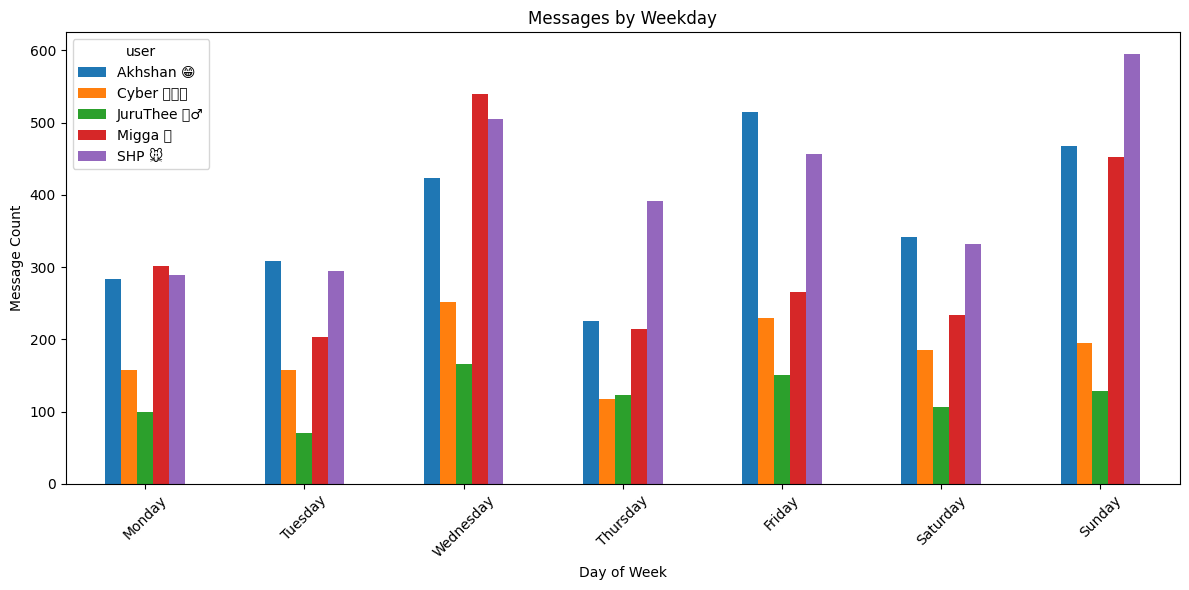

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:49: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:49: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:49: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:49: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:49: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

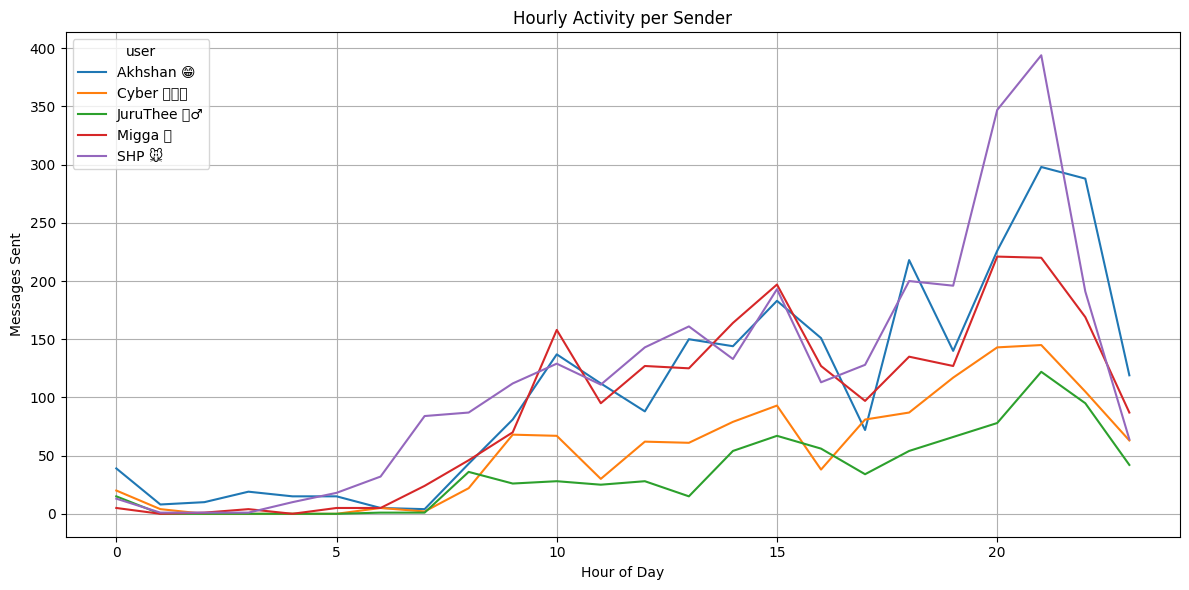

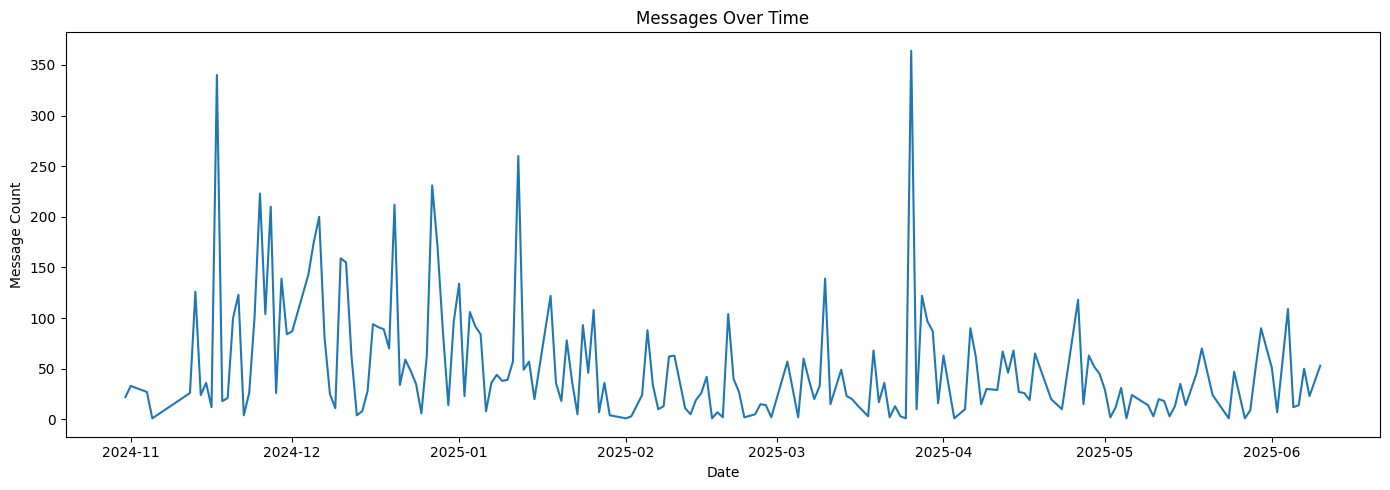

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:64: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:64: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:64: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:64: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:64: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

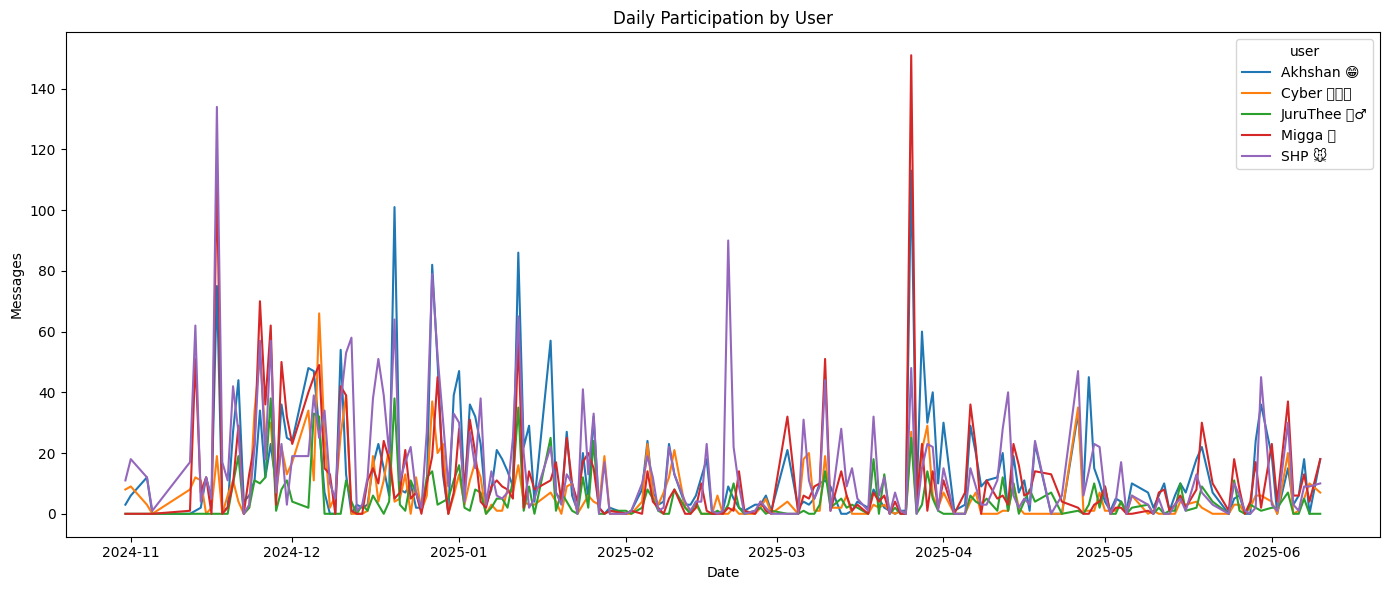

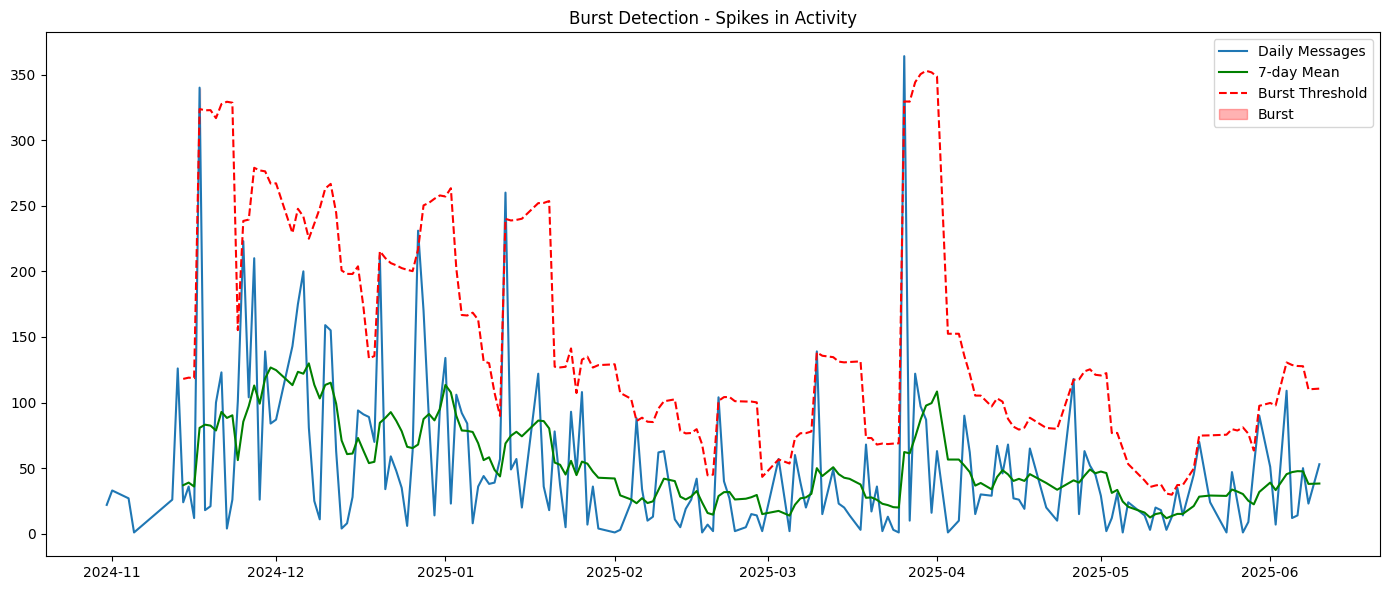

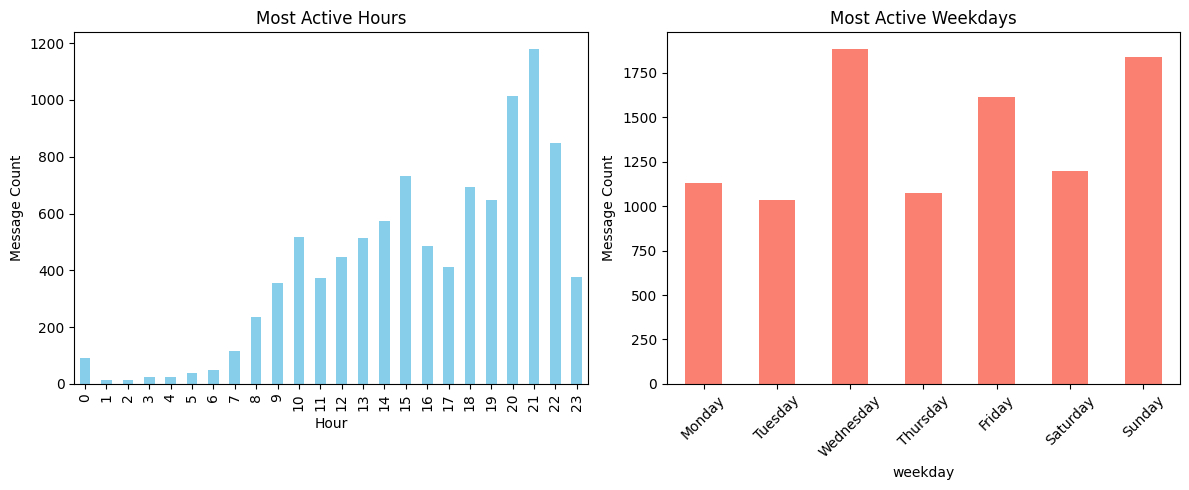

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missi

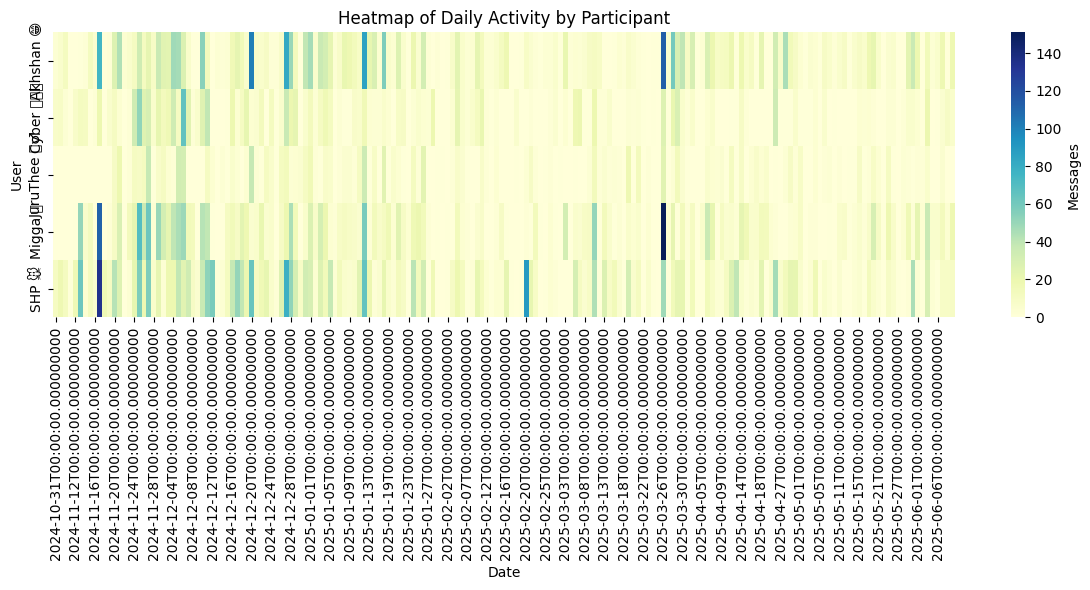

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:120: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:120: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:120: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:120: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\1650358027.py:120: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.ca

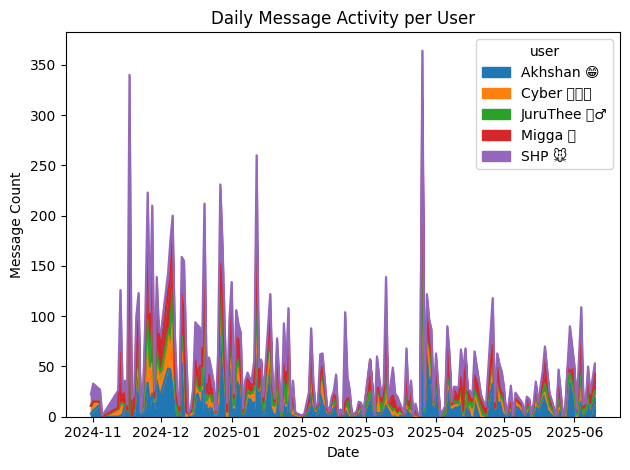

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Load and preprocess
df = pd.read_csv(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv", parse_dates=['date_time'])

# Extract features
df['date'] = df['date_time'].dt.date
df['weekday'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.normalize()
df['week'] = df['date_time'].dt.to_period("W").apply(lambda r: r.start_time)

# Optionally exclude system messages (e.g., "user joined", etc.)
# df = df[~df['message'].str.contains("joined|left", na=False)]

# --- 1. Per-Participant Stats ---
user_stats = df.groupby('user').agg(
    messages=('message', 'count'),
    words=('message', lambda x: x.str.split().str.len().sum()),
    avg_words=('message', lambda x: x.str.split().str.len().mean()),
).sort_values('messages', ascending=False)

print("=== Per-Participant Stats ===")
print(user_stats)

# --- 2. Messages by Weekday ---
weekday_stats = df.groupby(['user', 'weekday']).size().unstack().fillna(0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats = weekday_stats[weekday_order]

weekday_stats.T.plot(kind='bar', figsize=(12,6))
plt.title("Messages by Weekday")
plt.ylabel("Message Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Hourly Activity per Sender ---
hourly_stats = df.groupby(['user', 'hour']).size().unstack(fill_value=0)
hourly_stats.T.plot(figsize=(12,6))
plt.title("Hourly Activity per Sender")
plt.xlabel("Hour of Day")
plt.ylabel("Messages Sent")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Message Distribution Over Time ---
df.groupby('date').size().plot(figsize=(14, 5), title="Messages Over Time")
plt.ylabel("Message Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# --- 5. Daily Participation of Each Member ---
daily_user = df.groupby(['date', 'user']).size().unstack().fillna(0)
daily_user.plot(figsize=(14,6), title="Daily Participation by User")
plt.xlabel("Date")
plt.ylabel("Messages")
plt.tight_layout()
plt.show()

# --- 6. Burst Detection (Spikes in Activity) ---
daily_total = df.groupby('date').size()
rolling_mean = daily_total.rolling(window=7).mean()
rolling_std = daily_total.rolling(window=7).std()
threshold = rolling_mean + 2 * rolling_std

plt.figure(figsize=(14,6))
plt.plot(daily_total, label='Daily Messages')
plt.plot(rolling_mean, label='7-day Mean', color='green')
plt.plot(threshold, label='Burst Threshold', linestyle='--', color='red')
plt.fill_between(daily_total.index, threshold, daily_total, where=daily_total > threshold, color='red', alpha=0.3, label='Burst')
plt.title("Burst Detection - Spikes in Activity")
plt.legend()
plt.tight_layout()
plt.show()

# --- 7. Most Active Hours and Days ---
most_active_hour = df.groupby('hour').size()
most_active_day = df.groupby('weekday').size()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
most_active_hour.plot(kind='bar', color='skyblue')
plt.title("Most Active Hours")
plt.xlabel("Hour")
plt.ylabel("Message Count")

plt.subplot(1, 2, 2)
most_active_day = most_active_day[weekday_order]
most_active_day.plot(kind='bar', color='salmon')
plt.title("Most Active Weekdays")
plt.ylabel("Message Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- 8. Heatmap of Daily Activity by Participant ---
heatmap_data = df.groupby(['day', 'user']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="YlGnBu", cbar_kws={'label': 'Messages'})
plt.title("Heatmap of Daily Activity by Participant")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

# --- 9. Daily Activity by Participant (Stacked Area) ---
plt.figure(figsize=(14,6))
daily_user.plot.area(stacked=True)
plt.title("Daily Message Activity per User")
plt.ylabel("Message Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:50: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:50: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:50: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:50: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\ana

=== Per-Participant Stats ===
               messages  words  avg_words
user                                     
SHP 🐭              2368   9491   4.008024
Migga 🤓            2069  12041   5.819720
Akhshan 😁          1925   9554   4.963117
Cyber 🥚🐛🔥          1032   5277   5.113372
JuruThee 🙇‍♂️       783   5894   7.527458


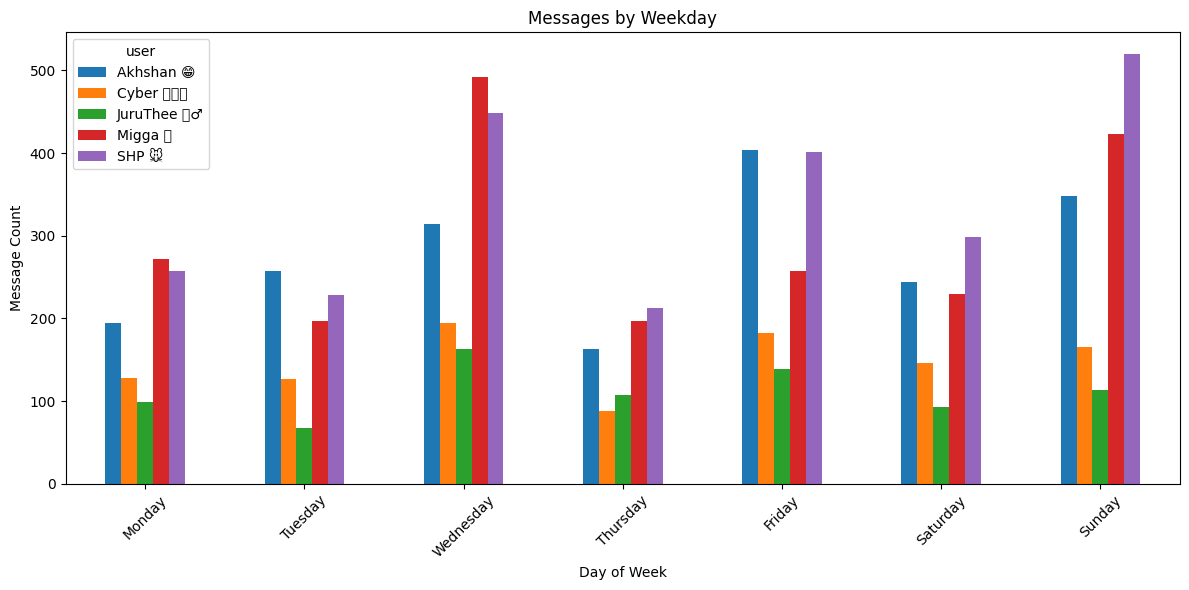

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:60: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:60: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:60: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:60: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:60: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

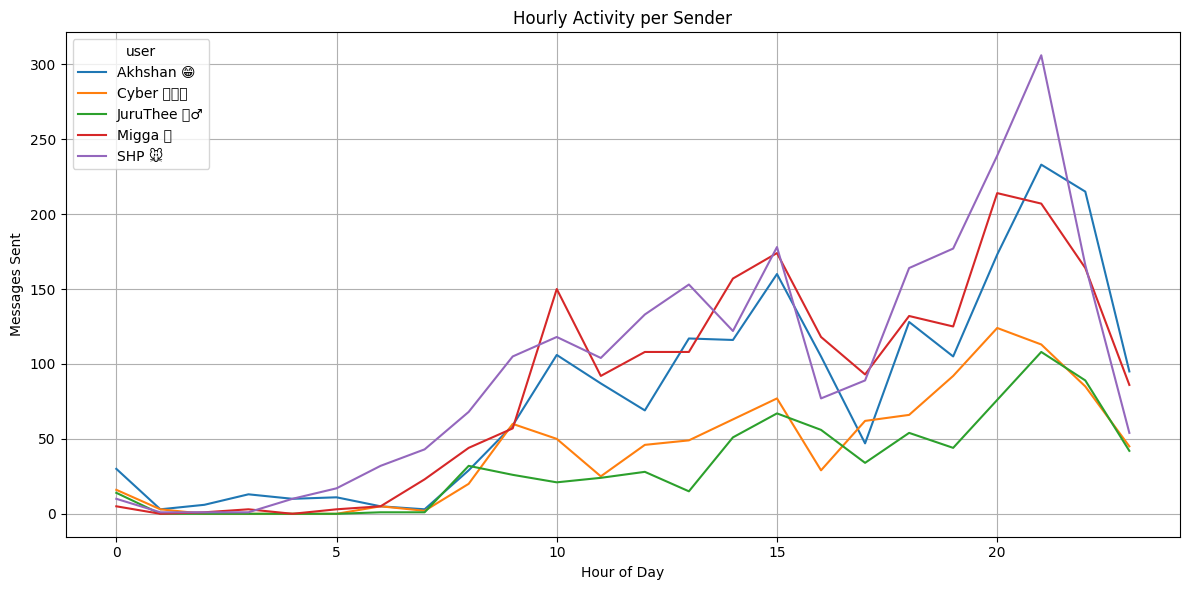

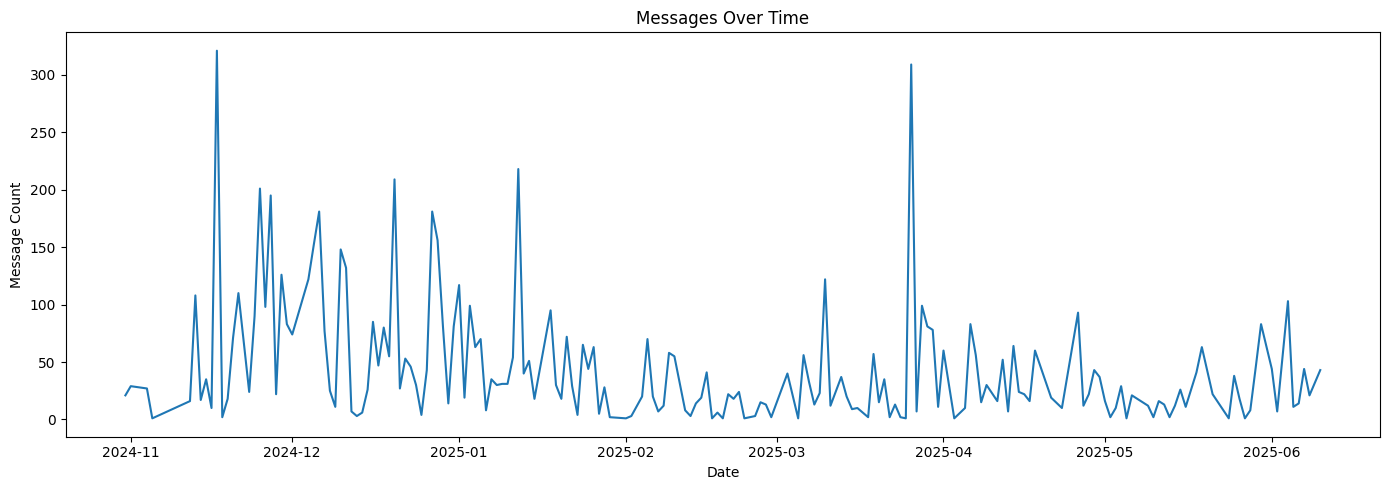

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:75: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:75: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:75: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:75: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:75: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

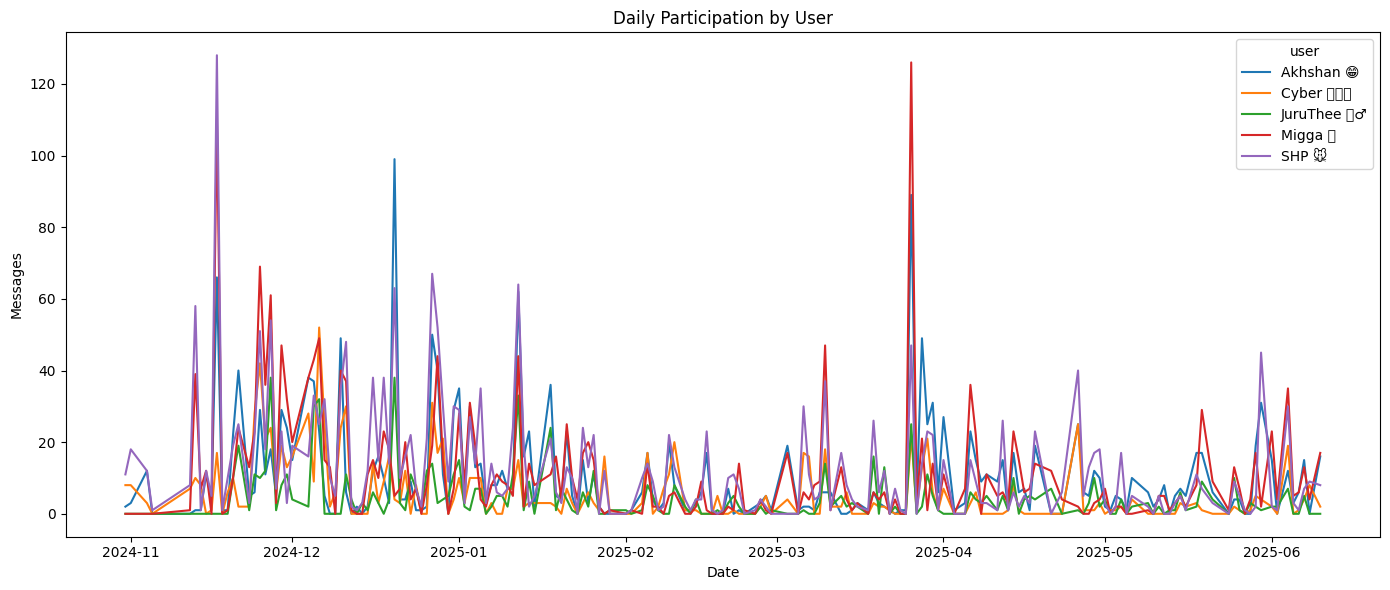

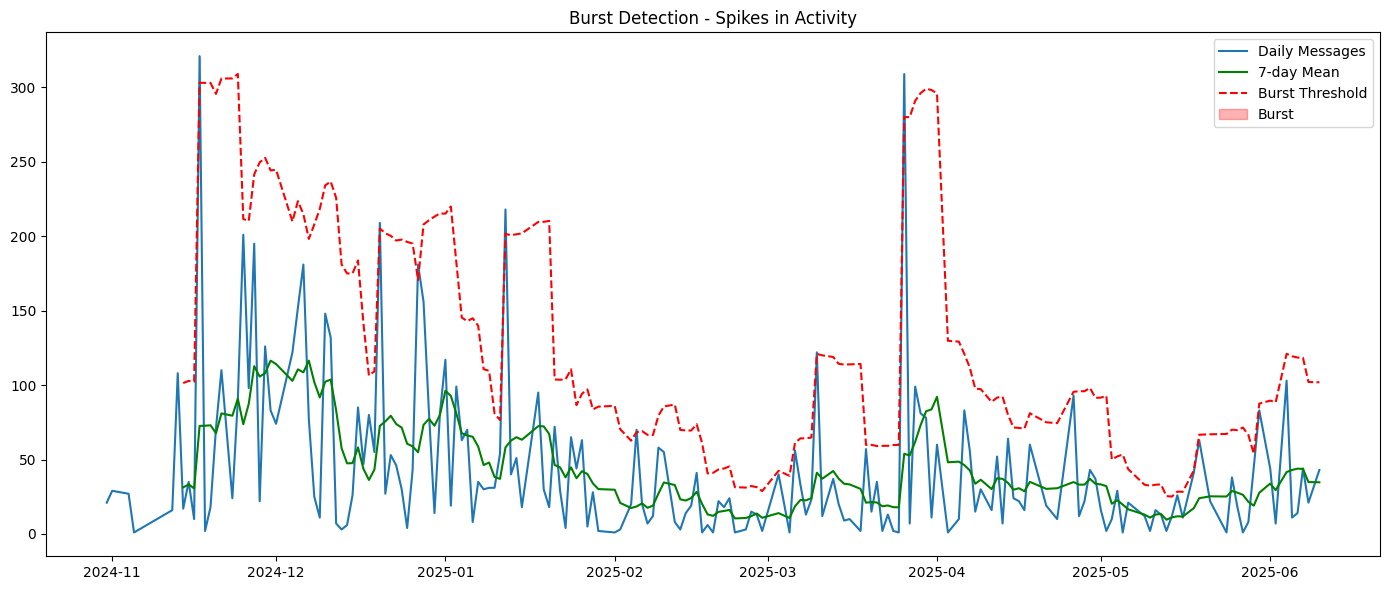

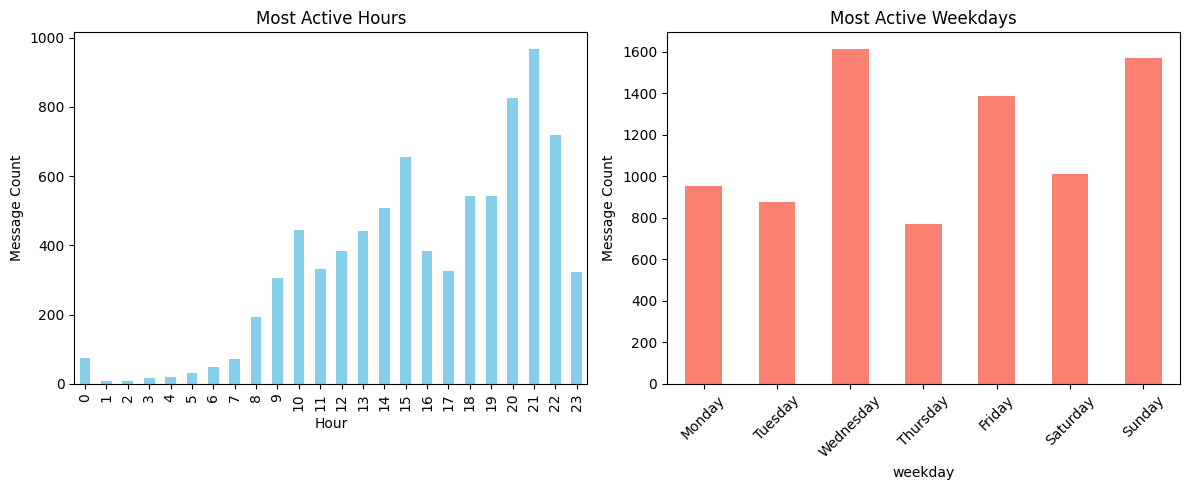

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missi

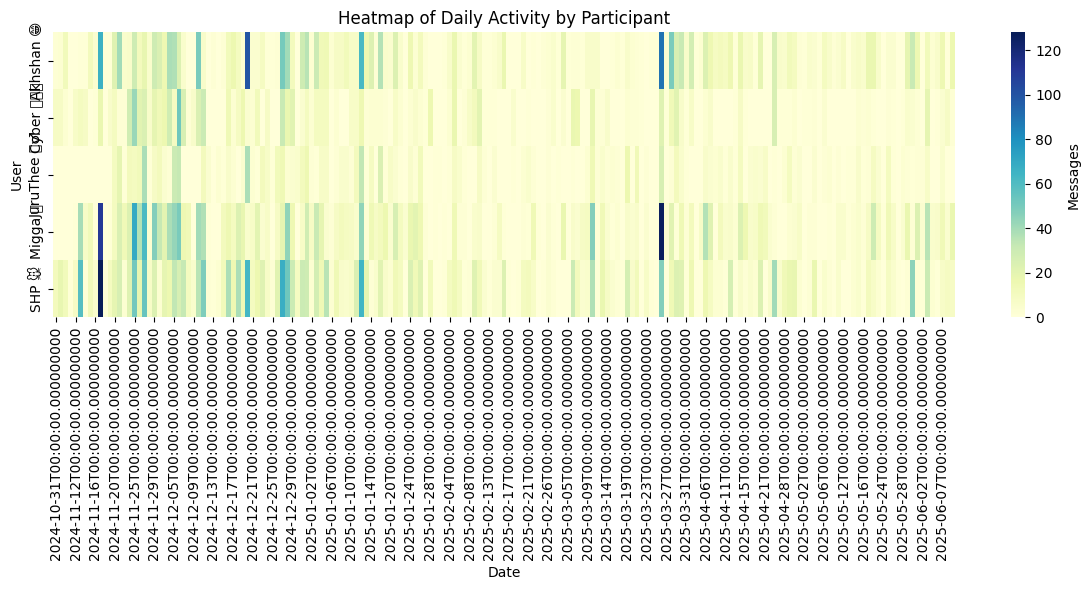

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:131: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:131: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:131: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:131: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:131: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.ca

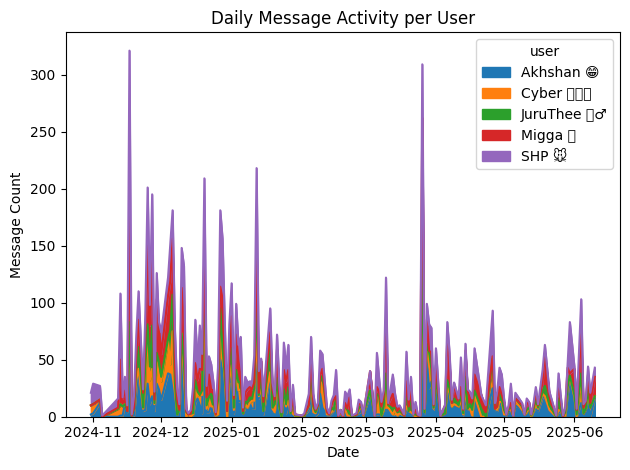

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:151: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:151: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:151: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:151: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

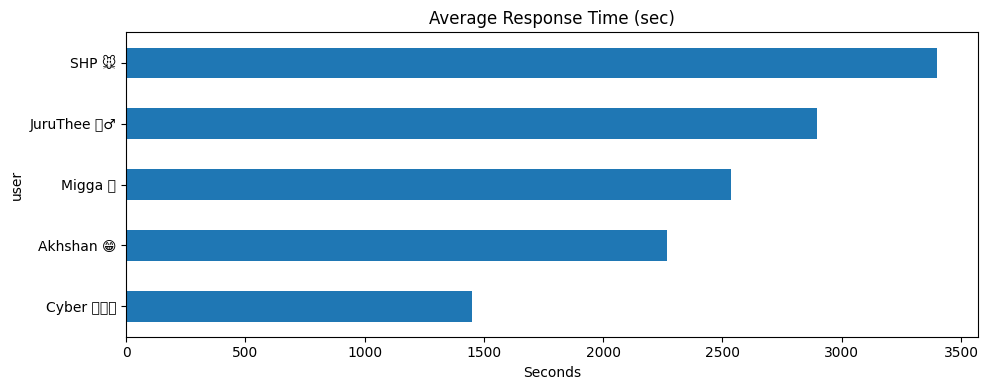

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

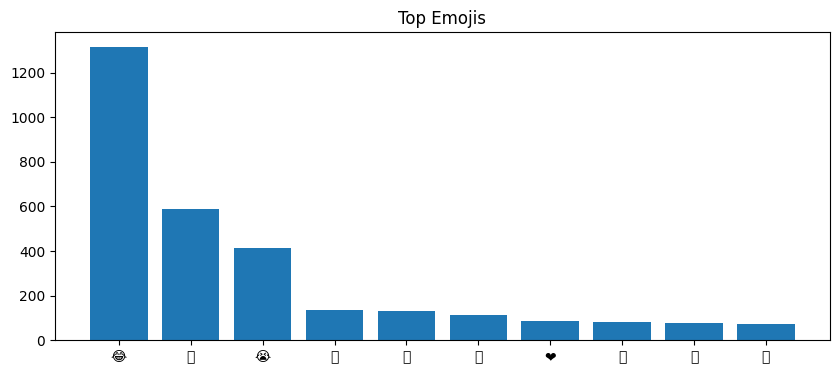

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:173: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:173: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:173: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:173: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:173: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

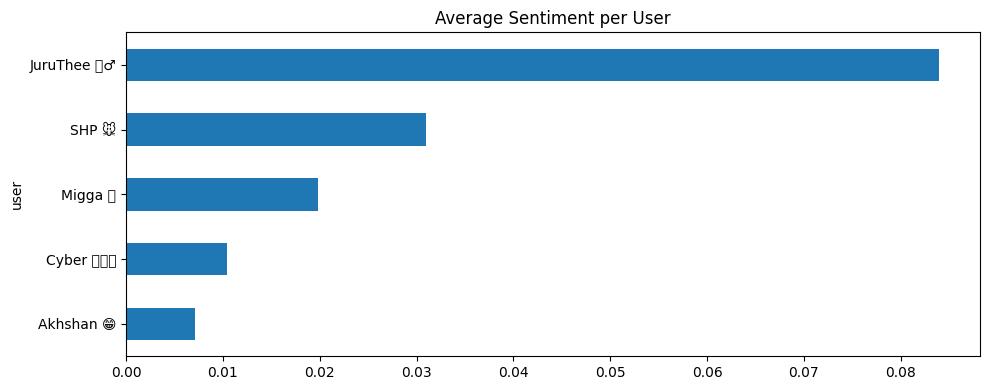

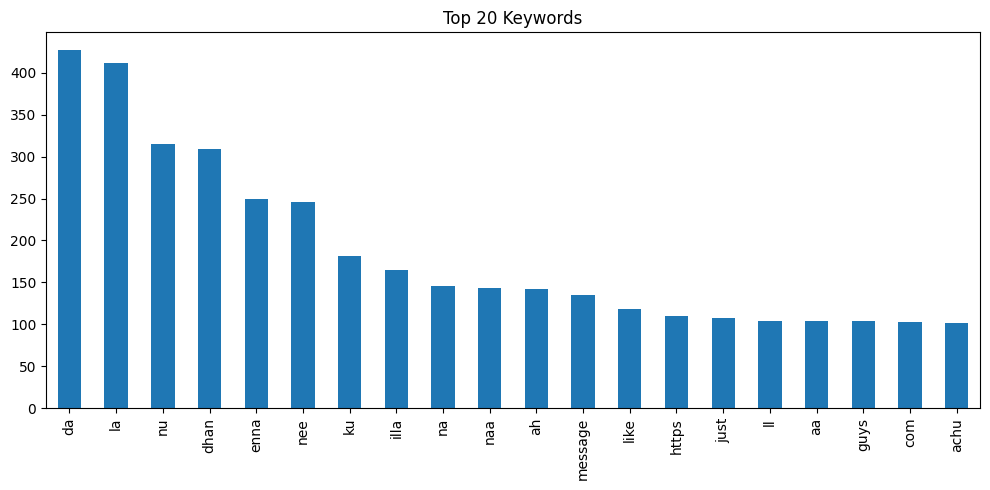


=== Text Style Metrics ===
               caps_ratio  char_count  word_count
user                                             
JuruThee 🙇‍♂️         0.0   42.272031    7.527458
Migga 🤓               0.0   32.599807    5.819720
Cyber 🥚🐛🔥             0.0   30.469961    5.113372
Akhshan 😁             0.0   27.225974    4.963117
SHP 🐭                 0.0   23.012669    4.008024


C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:214: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:214: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:214: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:214: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:214: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

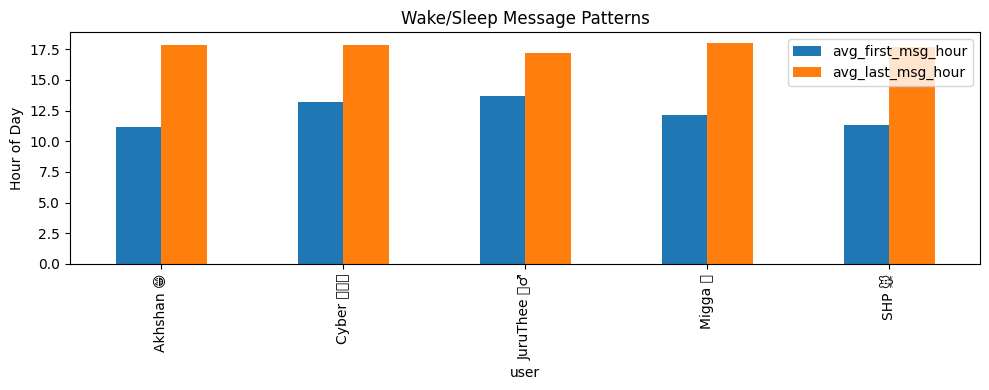

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:224: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:224: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:224: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:224: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\2950586155.py:224: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.pr

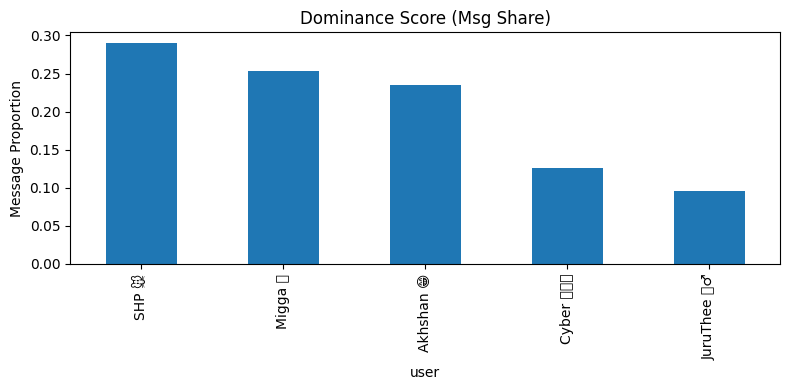


=== Longest Silence Per User ===
user
SHP 🐭           7 days 07:51:45
JuruThee 🙇‍♂️   2 days 21:45:49
Akhshan 😁       2 days 18:30:49
Migga 🤓         2 days 13:18:58
Cyber 🥚🐛🔥       0 days 22:32:24
Name: gap_to_next, dtype: timedelta64[ns]


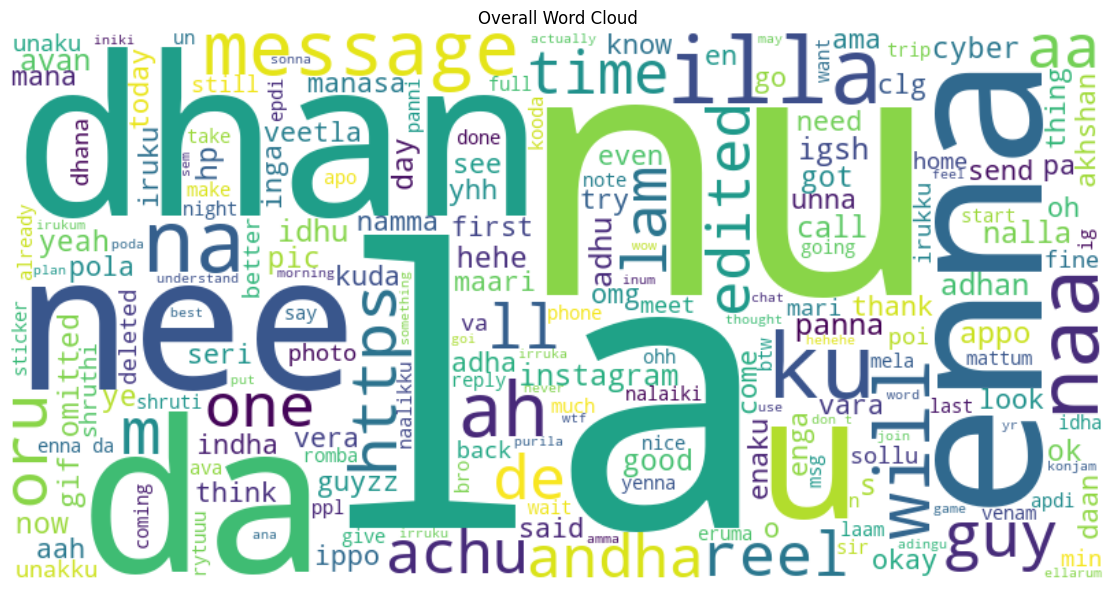

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import string
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load the dataset
file_path = r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv"
df = pd.read_csv(file_path, parse_dates=['date_time'])

# --- Preprocessing ---
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.day_name()
df['day'] = df['date_time'].dt.normalize()

# Remove empty or system messages
df = df.dropna(subset=['message'])
df = df[df['message'].str.strip().astype(bool)]


user_stats = df.groupby('user').agg(
    messages=('message', 'count'),
    words=('message', lambda x: x.str.split().str.len().sum()),
    avg_words=('message', lambda x: x.str.split().str.len().mean()),
).sort_values('messages', ascending=False)

print("=== Per-Participant Stats ===")
print(user_stats)

# --- 2. Messages by Weekday ---
weekday_stats = df.groupby(['user', 'weekday']).size().unstack().fillna(0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats = weekday_stats[weekday_order]

weekday_stats.T.plot(kind='bar', figsize=(12,6))
plt.title("Messages by Weekday")
plt.ylabel("Message Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Hourly Activity per Sender ---
hourly_stats = df.groupby(['user', 'hour']).size().unstack(fill_value=0)
hourly_stats.T.plot(figsize=(12,6))
plt.title("Hourly Activity per Sender")
plt.xlabel("Hour of Day")
plt.ylabel("Messages Sent")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Message Distribution Over Time ---
df.groupby('date').size().plot(figsize=(14, 5), title="Messages Over Time")
plt.ylabel("Message Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# --- 5. Daily Participation of Each Member ---
daily_user = df.groupby(['date', 'user']).size().unstack().fillna(0)
daily_user.plot(figsize=(14,6), title="Daily Participation by User")
plt.xlabel("Date")
plt.ylabel("Messages")
plt.tight_layout()
plt.show()

# --- 6. Burst Detection (Spikes in Activity) ---
daily_total = df.groupby('date').size()
rolling_mean = daily_total.rolling(window=7).mean()
rolling_std = daily_total.rolling(window=7).std()
threshold = rolling_mean + 2 * rolling_std

plt.figure(figsize=(14,6))
plt.plot(daily_total, label='Daily Messages')
plt.plot(rolling_mean, label='7-day Mean', color='green')
plt.plot(threshold, label='Burst Threshold', linestyle='--', color='red')
plt.fill_between(daily_total.index, threshold, daily_total, where=daily_total > threshold, color='red', alpha=0.3, label='Burst')
plt.title("Burst Detection - Spikes in Activity")
plt.legend()
plt.tight_layout()
plt.show()

# --- 7. Most Active Hours and Days ---
most_active_hour = df.groupby('hour').size()
most_active_day = df.groupby('weekday').size()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
most_active_hour.plot(kind='bar', color='skyblue')
plt.title("Most Active Hours")
plt.xlabel("Hour")
plt.ylabel("Message Count")

plt.subplot(1, 2, 2)
most_active_day = most_active_day[weekday_order]
most_active_day.plot(kind='bar', color='salmon')
plt.title("Most Active Weekdays")
plt.ylabel("Message Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- 8. Heatmap of Daily Activity by Participant ---
heatmap_data = df.groupby(['day', 'user']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="YlGnBu", cbar_kws={'label': 'Messages'})
plt.title("Heatmap of Daily Activity by Participant")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

# --- 9. Daily Activity by Participant (Stacked Area) ---
plt.figure(figsize=(14,6))
daily_user.plot.area(stacked=True)
plt.title("Daily Message Activity per User")
plt.ylabel("Message Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()



# Word/char counts
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['char_count'] = df['message'].apply(len)

# --- 1. Response Time Analysis ---
df = df.sort_values(by='date_time')
df['next_user'] = df['user'].shift(-1)
df['next_time'] = df['date_time'].shift(-1)
df['response_time_sec'] = (df['next_time'] - df['date_time']).dt.total_seconds()
resp_df = df[df['user'] != df['next_user']]
avg_resp = resp_df.groupby('user')['response_time_sec'].mean().sort_values()

plt.figure(figsize=(10, 4))
avg_resp.plot(kind='barh', title='Average Response Time (sec)')
plt.xlabel("Seconds")
plt.tight_layout()
plt.show()

# --- 2. Emoji Usage Analysis ---
def extract_emojis(text):
    return [c for c in text if c in emoji.EMOJI_DATA]

df['emojis'] = df['message'].apply(extract_emojis)
emoji_counts = Counter([e for sublist in df['emojis'] for e in sublist])

if emoji_counts:
    plt.figure(figsize=(10, 4))
    top_emojis = dict(emoji_counts.most_common(10))
    plt.bar(top_emojis.keys(), top_emojis.values())
    plt.title("Top Emojis")
    plt.show()

# --- 3. Sentiment Analysis ---
df['sentiment'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(10, 4))
df.groupby('user')['sentiment'].mean().sort_values().plot(kind='barh', title="Average Sentiment per User")
plt.tight_layout()
plt.show()

# --- 4. Keyword (TF-IDF like Top Words) ---
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=100)
X = cv.fit_transform(df['message'])

word_freq = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()).sum().sort_values(ascending=False)
word_freq.head(20).plot(kind='bar', figsize=(10, 5), title="Top 20 Keywords")
plt.tight_layout()
plt.show()

# --- 5. Text Style Metrics ---
def caps_ratio(text):
    caps = sum(1 for c in text if c.isupper())
    return caps / len(text) if len(text) > 0 else 0

df['caps_ratio'] = df['message'].apply(caps_ratio)

text_metrics = df.groupby('user').agg({
    'caps_ratio': 'mean',
    'char_count': 'mean',
    'word_count': 'mean'
}).sort_values('char_count', ascending=False)

print("\n=== Text Style Metrics ===")
print(text_metrics)

# --- 6. Wake/Sleep Pattern (First & Last Message Hour) ---
first_hour = df.groupby(['date', 'user'])['hour'].min().reset_index().groupby('user')['hour'].mean()
last_hour = df.groupby(['date', 'user'])['hour'].max().reset_index().groupby('user')['hour'].mean()

wake_sleep = pd.DataFrame({
    'avg_first_msg_hour': first_hour,
    'avg_last_msg_hour': last_hour
})

wake_sleep.plot(kind='bar', figsize=(10, 4), title='Wake/Sleep Message Patterns')
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# --- 7. Participation Inequality / Dominance ---
msg_count = df['user'].value_counts()
dominance_score = (msg_count / msg_count.sum()).sort_values(ascending=False)

plt.figure(figsize=(8,4))
dominance_score.plot(kind='bar', title="Dominance Score (Msg Share)")
plt.ylabel("Message Proportion")
plt.tight_layout()
plt.show()

# --- 8. Longest Silent Gaps per User ---
df['gap_to_next'] = df['date_time'].shift(-1) - df['date_time']
silence = df[df['user'] != df['next_user']].groupby('user')['gap_to_next'].max().sort_values(ascending=False)

print("\n=== Longest Silence Per User ===")
print(silence)

# --- 9. Wordcloud of All Messages ---
all_text = ' '.join(df['message'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Word Cloud")
plt.tight_layout()
plt.show()


In [14]:
def analyze_whatsapp_chat(file_path):
    """
    Analyze WhatsApp chat data and return a dictionary of results.
    
    Args:
        file_path (str): Path to the WhatsApp chat CSV file
        
    Returns:
        dict: Dictionary containing all analysis results
    """
    # Load and preprocess data
    df = pd.read_csv(file_path, parse_dates=['date_time'])
    df['date'] = df['date_time'].dt.date
    df['hour'] = df['date_time'].dt.hour
    df['weekday'] = df['date_time'].dt.day_name()
    df['day'] = df['date_time'].dt.normalize()
    df = df.dropna(subset=['message'])
    df = df[df['message'].str.strip().astype(bool)]
    
    # Initialize results dictionary
    results = {}
    
    # 1. Basic User Stats
    user_stats = df.groupby('user').agg(
        messages=('message', 'count'),
        words=('message', lambda x: x.str.split().str.len().sum()),
        avg_words=('message', lambda x: x.str.split().str.len().mean()),
    ).sort_values('messages', ascending=False)
    results['user_stats'] = user_stats
    
    # 2. Temporal Patterns
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    results['weekday_stats'] = df.groupby(['user', 'weekday']).size().unstack().fillna(0)[weekday_order]
    results['hourly_stats'] = df.groupby(['user', 'hour']).size().unstack(fill_value=0)
    
    # 3. Message Distribution
    results['daily_messages'] = df.groupby('date').size()
    results['daily_user'] = df.groupby(['date', 'user']).size().unstack().fillna(0)
    
    # 4. Burst Detection
    rolling_mean = results['daily_messages'].rolling(window=7).mean()
    rolling_std = results['daily_messages'].rolling(window=7).std()
    results['burst_detection'] = {
        'daily': results['daily_messages'],
        'rolling_mean': rolling_mean,
        'threshold': rolling_mean + 2 * rolling_std
    }
    
    # 5. Text Analysis
    df['word_count'] = df['message'].apply(lambda x: len(x.split()))
    df['char_count'] = df['message'].apply(len)
    results['text_metrics'] = df.groupby('user').agg({
        'word_count': 'mean',
        'char_count': 'mean'
    })
    
    # 6. Response Time Analysis
    df = df.sort_values(by='date_time')
    df['next_user'] = df['user'].shift(-1)
    df['next_time'] = df['date_time'].shift(-1)
    df['response_time_sec'] = (df['next_time'] - df['date_time']).dt.total_seconds()
    resp_df = df[df['user'] != df['next_user']]
    results['response_times'] = resp_df.groupby('user')['response_time_sec'].mean().sort_values()
    
    # 7. Emoji Analysis
    def extract_emojis(text):
        return [c for c in text if c in emoji.EMOJI_DATA]
    df['emojis'] = df['message'].apply(extract_emojis)
    emoji_counts = Counter([e for sublist in df['emojis'] for e in sublist])
    results['emoji_counts'] = emoji_counts
    
    # 8. Sentiment Analysis
    df['sentiment'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])
    results['sentiment'] = df.groupby('user')['sentiment'].mean().sort_values()
    
    # 9. Keyword Analysis
    cv = CountVectorizer(stop_words='english', max_features=100)
    X = cv.fit_transform(df['message'])
    word_freq = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()).sum().sort_values(ascending=False)
    results['keywords'] = word_freq
    
    # 10. Wake/Sleep Patterns
    first_hour = df.groupby(['date', 'user'])['hour'].min().reset_index().groupby('user')['hour'].mean()
    last_hour = df.groupby(['date', 'user'])['hour'].max().reset_index().groupby('user')['hour'].mean()
    results['wake_sleep'] = pd.DataFrame({
        'avg_first_msg_hour': first_hour,
        'avg_last_msg_hour': last_hour
    })
    
    # 11. Dominance Score
    results['dominance'] = df['user'].value_counts(normalize=True).sort_values(ascending=False)
    
    # 12. Silent Gaps
    df['gap_to_next'] = df['date_time'].shift(-1) - df['date_time']
    results['silence_gaps'] = df[df['user'] != df['next_user']].groupby('user')['gap_to_next'].max().sort_values(ascending=False)
    
    # 13. Word Cloud Data
    results['all_text'] = ' '.join(df['message'].dropna())
    
    return results

def plot_whatsapp_analysis(results, plot_type='all'):
    """
    Plot WhatsApp chat analysis results.
    
    Args:
        results (dict): Dictionary from analyze_whatsapp_chat()
        plot_type (str): Type of plot to show ('all' or specific plot)
    """
    if plot_type == 'all' or plot_type == 'user_stats':
        # User statistics
        results['user_stats'].plot(kind='bar', subplots=True, figsize=(10, 8))
        plt.suptitle("User Statistics")
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'temporal':
        # Temporal patterns
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Weekday stats
        results['weekday_stats'].T.plot(kind='bar', ax=ax1)
        ax1.set_title("Messages by Weekday")
        ax1.set_ylabel("Message Count")
        
        # Hourly stats
        results['hourly_stats'].T.plot(ax=ax2)
        ax2.set_title("Hourly Activity")
        ax2.set_xlabel("Hour of Day")
        ax2.set_ylabel("Messages Sent")
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'activity':
        # Activity patterns
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Daily messages
        results['daily_messages'].plot(ax=ax1)
        ax1.set_title("Messages Over Time")
        ax1.set_ylabel("Message Count")
        
        # Daily user participation
        results['daily_user'].plot(ax=ax2)
        ax2.set_title("Daily Participation by User")
        ax2.set_ylabel("Messages")
        
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'burst':
        # Burst detection
        plt.figure(figsize=(14,6))
        plt.plot(results['burst_detection']['daily'], label='Daily Messages')
        plt.plot(results['burst_detection']['rolling_mean'], label='7-day Mean', color='green')
        plt.plot(results['burst_detection']['threshold'], label='Burst Threshold', linestyle='--', color='red')
        plt.fill_between(
            results['burst_detection']['daily'].index, 
            results['burst_detection']['threshold'], 
            results['burst_detection']['daily'], 
            where=results['burst_detection']['daily'] > results['burst_detection']['threshold'], 
            color='red', alpha=0.3, label='Burst'
        )
        plt.title("Burst Detection - Spikes in Activity")
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'text':
        # Text analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Response times
        results['response_times'].plot(kind='barh', ax=ax1)
        ax1.set_title("Average Response Time (sec)")
        ax1.set_xlabel("Seconds")
        
        # Sentiment analysis
        results['sentiment'].plot(kind='barh', ax=ax2)
        ax2.set_title("Average Sentiment per User")
        
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'emojis':
        # Emoji analysis
        if results['emoji_counts']:
            top_emojis = dict(Counter(results['emoji_counts']).most_common(10))
            plt.figure(figsize=(10, 4))
            plt.bar(top_emojis.keys(), top_emojis.values())
            plt.title("Top Emojis")
            plt.show()
    
    if plot_type == 'all' or plot_type == 'keywords':
        # Keyword analysis
        results['keywords'].head(20).plot(kind='bar', figsize=(10, 5))
        plt.title("Top 20 Keywords")
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'patterns':
        # Behavioral patterns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Wake/sleep patterns
        results['wake_sleep'].plot(kind='bar', ax=ax1)
        ax1.set_title('Wake/Sleep Message Patterns')
        ax1.set_ylabel("Hour of Day")
        
        # Dominance score
        results['dominance'].plot(kind='bar', ax=ax2)
        ax2.set_title("Dominance Score (Msg Share)")
        ax2.set_ylabel("Message Proportion")
        
        plt.tight_layout()
        plt.show()
    
    if plot_type == 'all' or plot_type == 'wordcloud':
        # Word cloud
        wc = WordCloud(width=800, height=400, background_color='white').generate(results['all_text'])
        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title("Overall Word Cloud")
        plt.tight_layout()
        plt.show()

# Example usage:
# results = analyze_whatsapp_chat(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv")
# plot_whatsapp_analysis(results, plot_type='all')  # or specify a specific plot type

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:114: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:114: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:114: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:114: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:114: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.pr

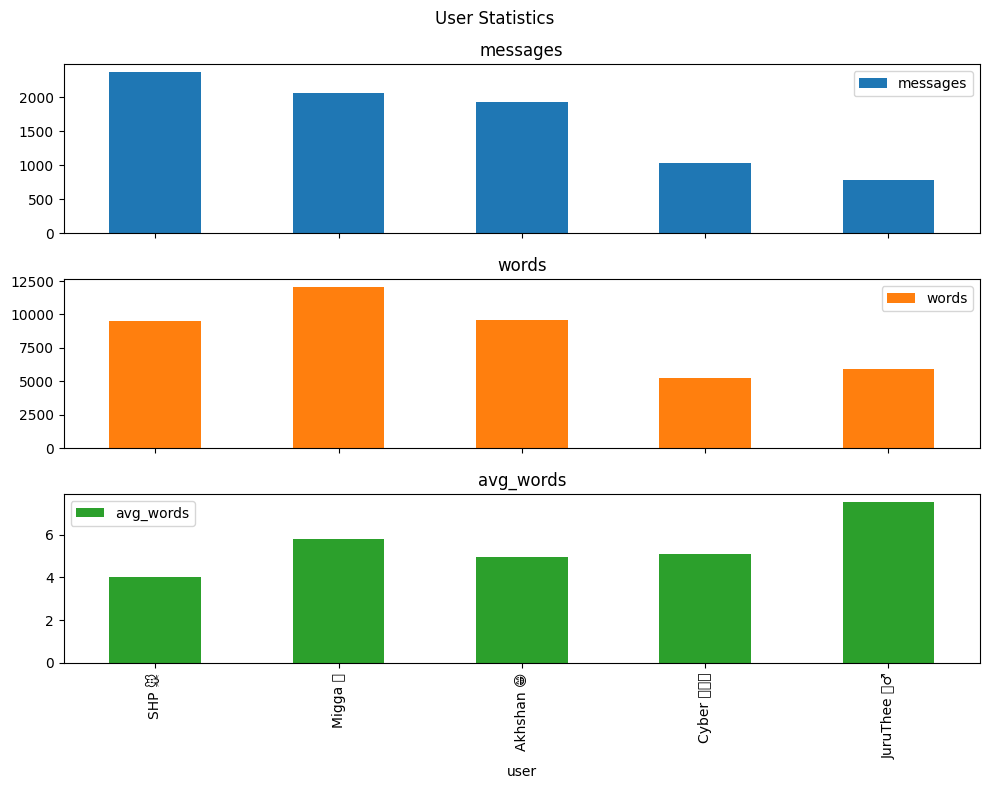

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:133: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:133: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:133: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:133: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:133: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

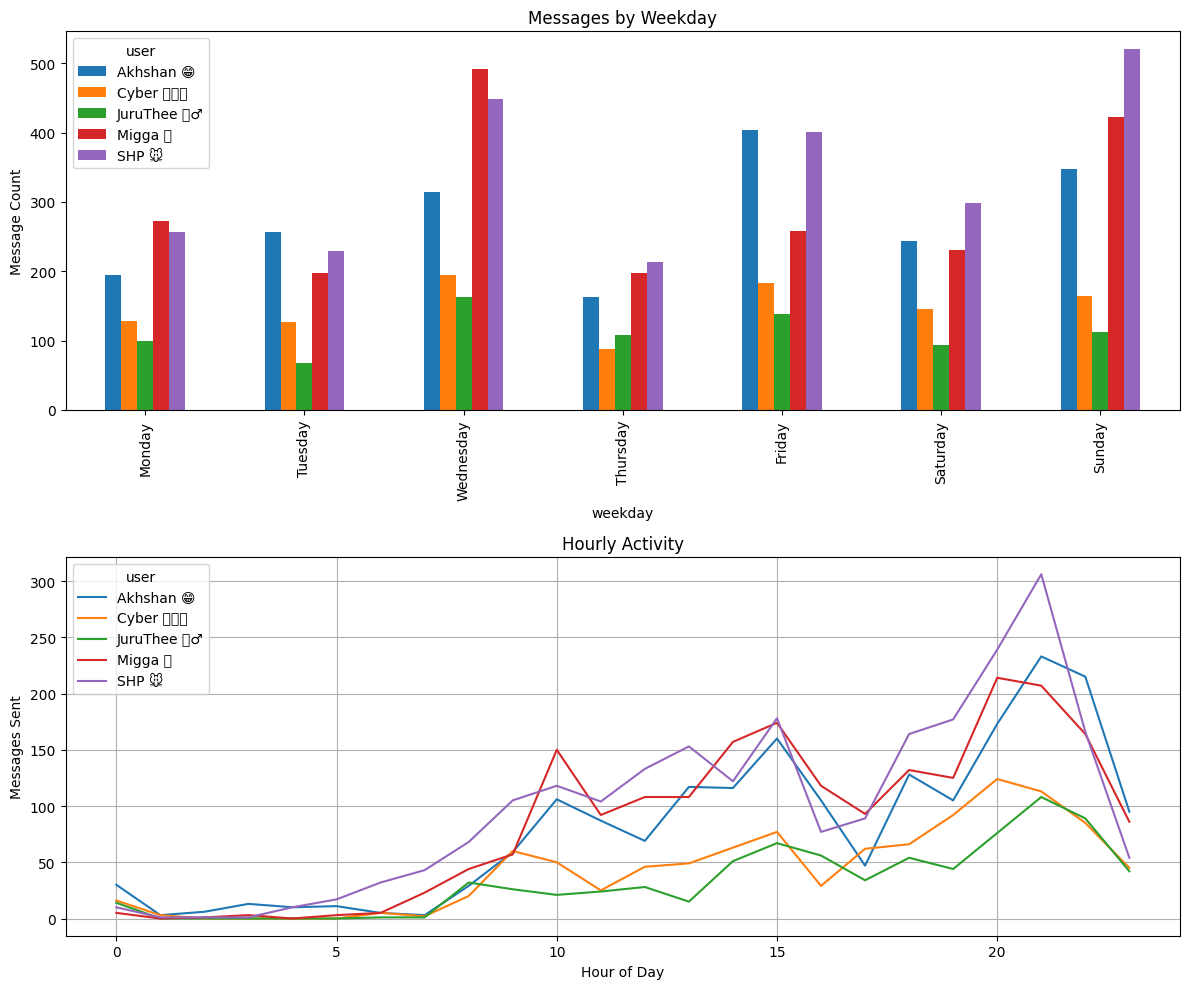

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:150: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:150: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:150: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:150: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:150: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

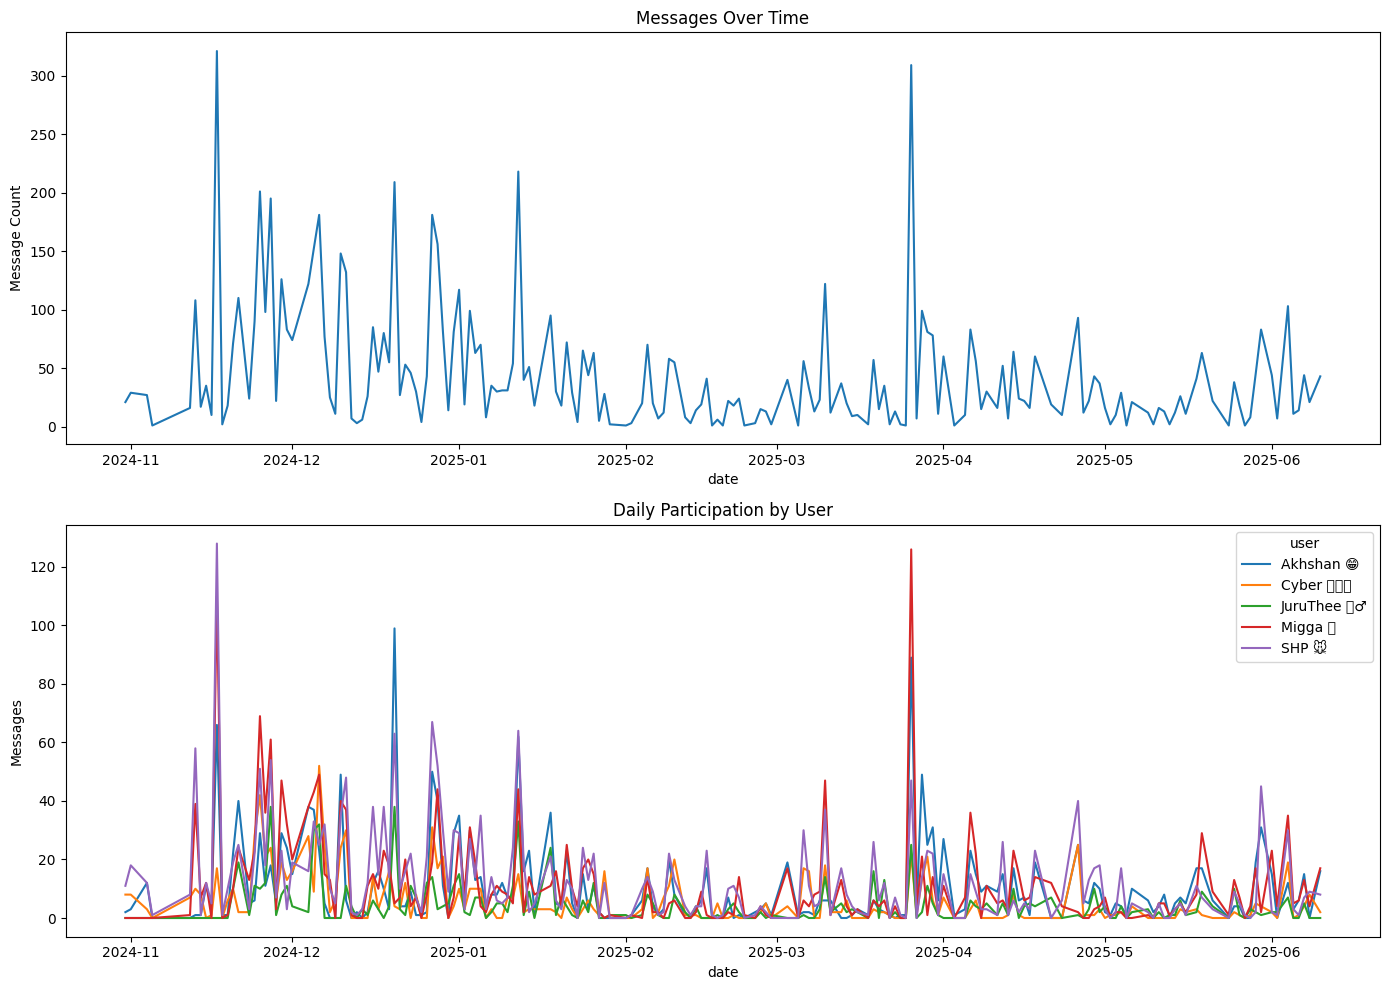

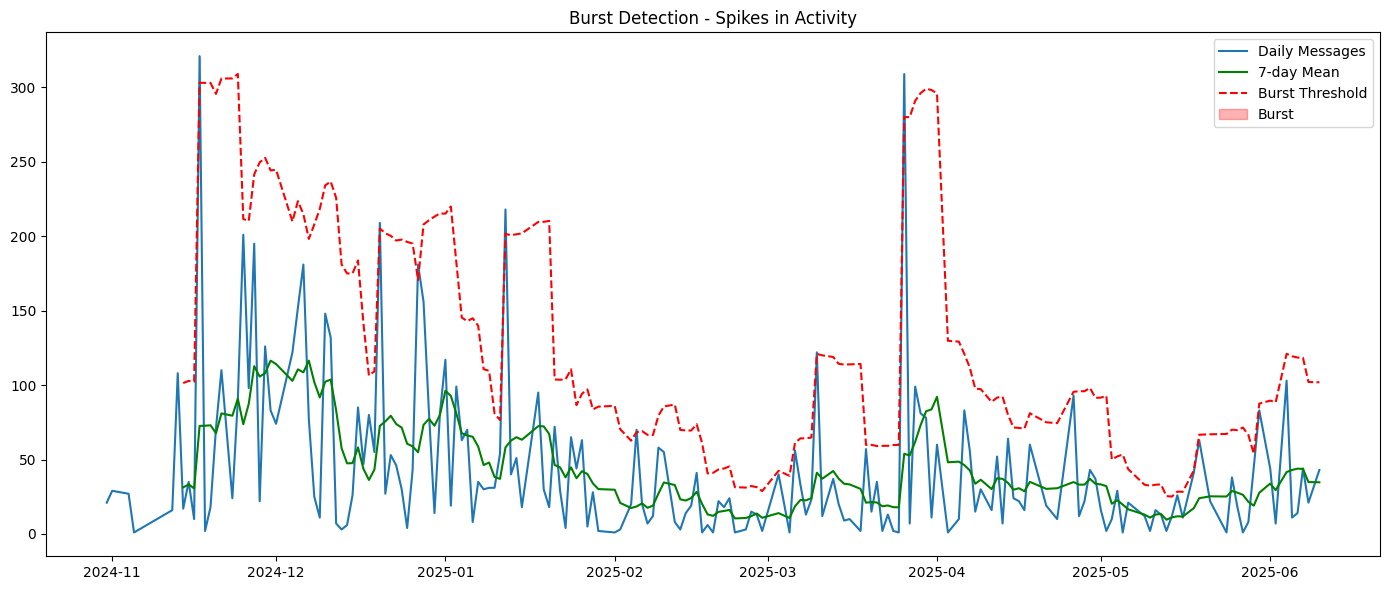

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

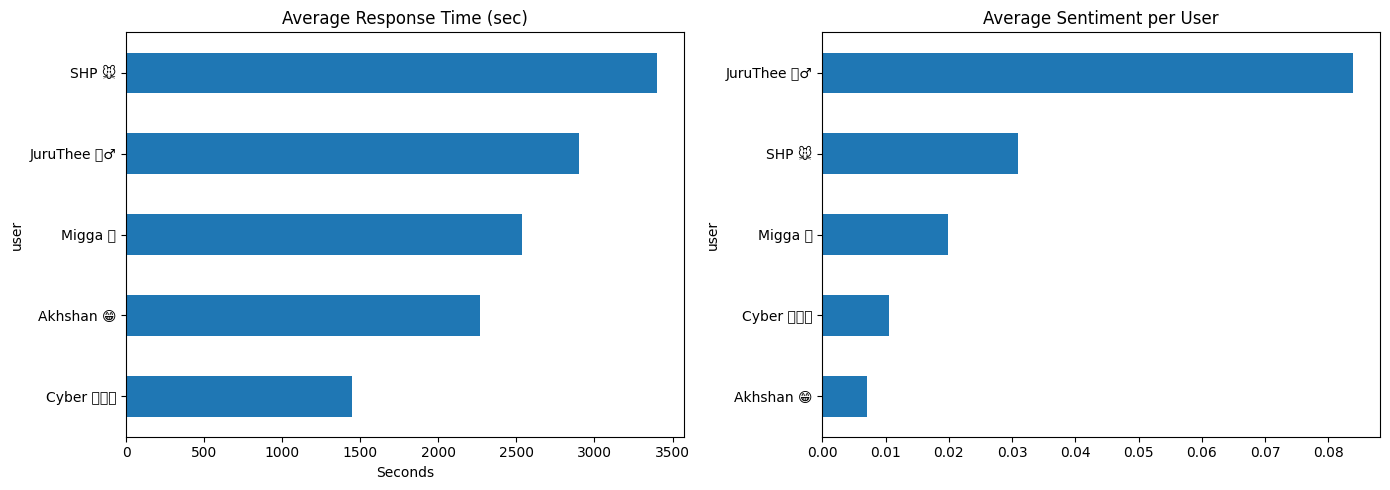

c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

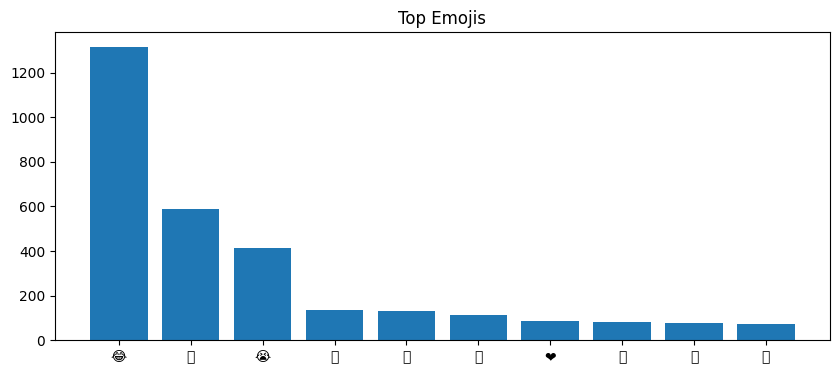

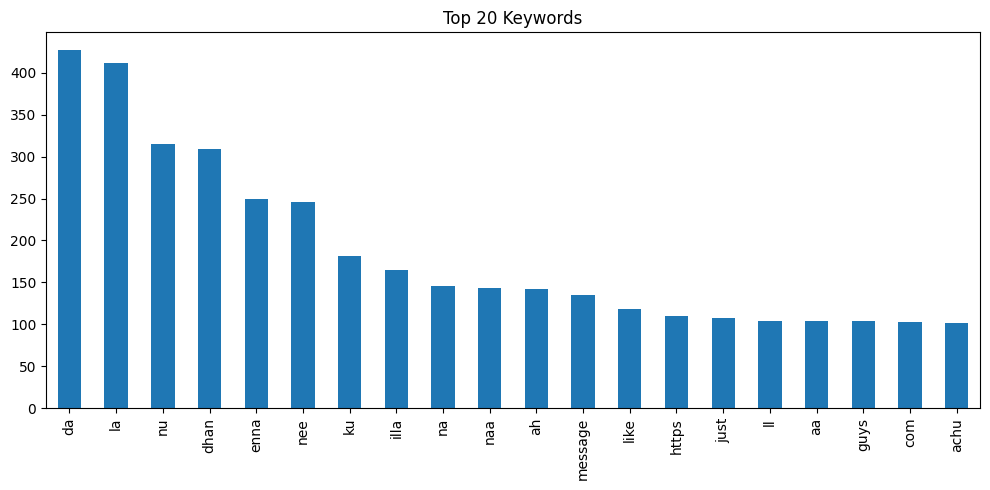

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:217: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:217: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:217: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:217: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:217: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

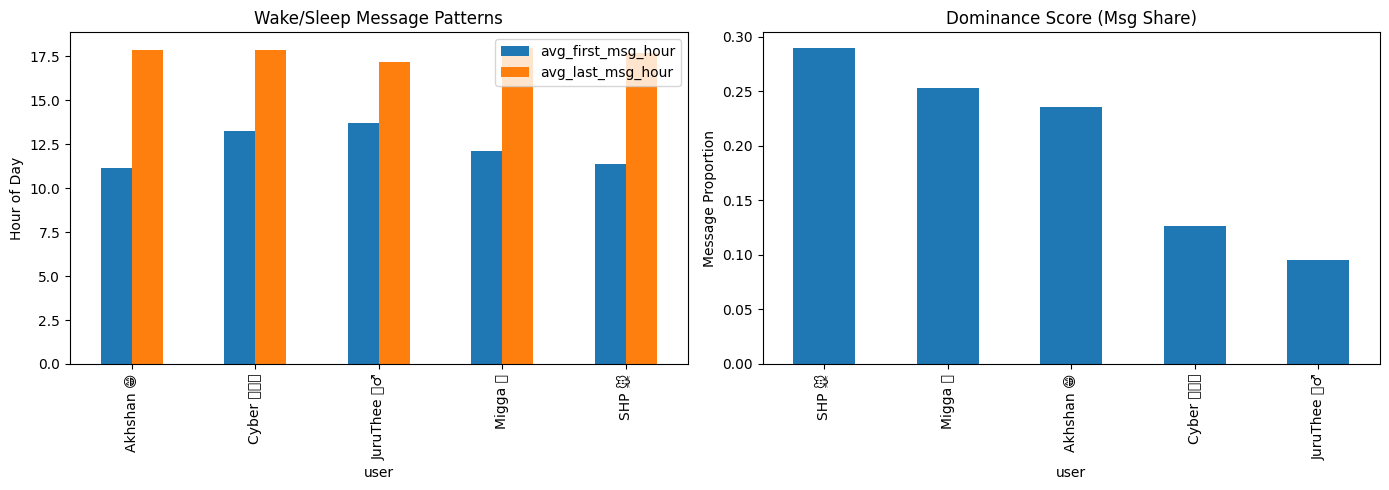

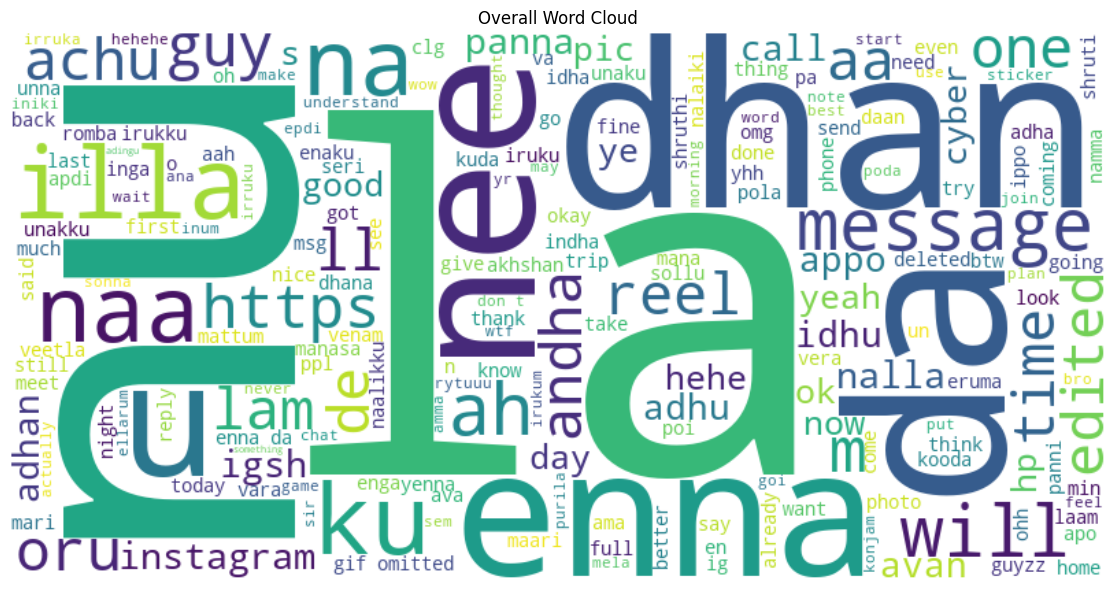

C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128027 (\N{BUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhsh\AppData\Local\Temp\ipykernel_2044\3981190241.py:184: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\akhsh\anaconda3\envs\torchy_in\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

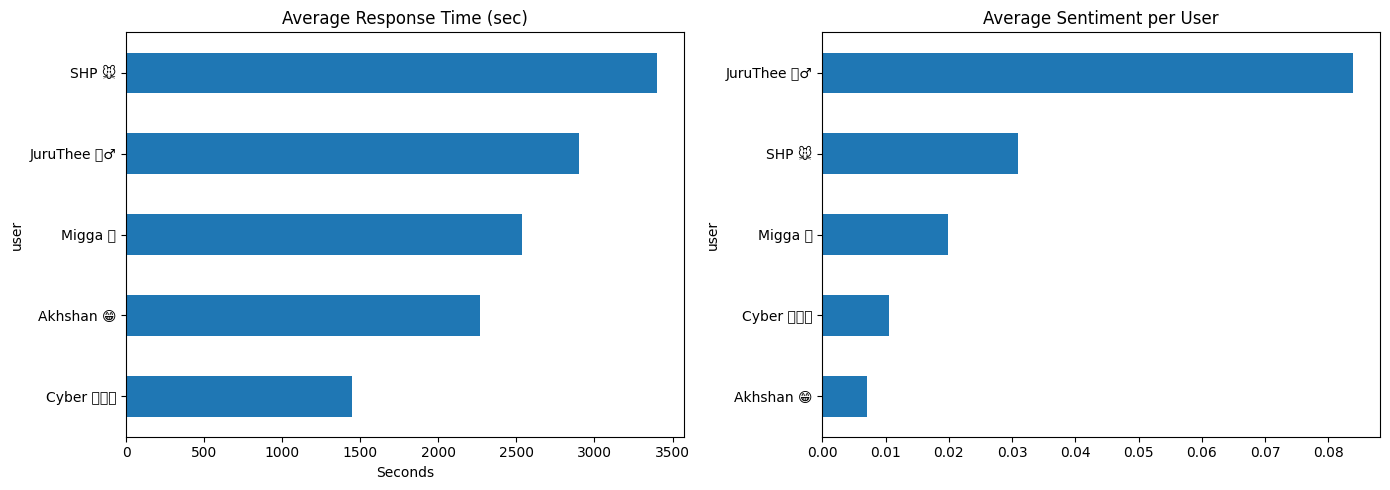

In [15]:
# Analyze
results = analyze_whatsapp_chat(r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv")

# Plot everything
plot_whatsapp_analysis(results)

# Or plot specific categories
plot_whatsapp_analysis(results, plot_type='text')

In [16]:
results

{'user_stats':                messages  words  avg_words
 user                                     
 SHP 🐭              2368   9491   4.008024
 Migga 🤓            2069  12041   5.819720
 Akhshan 😁          1925   9554   4.963117
 Cyber 🥚🐛🔥          1032   5277   5.113372
 JuruThee 🙇‍♂️       783   5894   7.527458,
 'weekday_stats': weekday        Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
 user                                                                         
 Akhshan 😁         195      257        314       163     404       244     348
 Cyber 🥚🐛🔥         128      127        195        88     183       146     165
 JuruThee 🙇‍♂️      99       68        163       108     139        93     113
 Migga 🤓           272      197        492       197     258       230     423
 SHP 🐭             257      229        449       213     401       299     520,
 'hourly_stats': hour           0   1   2   3   4   5   6   7   8    9   ...   14   15   16  \
 user             

In [17]:
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple, Optional, Union
import re
from collections import Counter, defaultdict
from datetime import datetime, timedelta
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

class TamilEnglishChatRAG:
    def __init__(self, csv_file_path: str):
        """
        Initialize the RAG system for Tamil-English chat data
        
        Args:
            csv_file_path: Path to the CSV file with columns: user, date_time, user, message_type, message
        """
        self.df = pd.read_csv(csv_file_path)
        self.df['date_time'] = pd.to_datetime(self.df['date_time'])
        
        # Preprocess and prepare data
        self._preprocess_data()
        self._build_indices()
        
        print(f"Loaded {len(self.df)} chat messages")
        print(f"Users: {self.df['user'].nunique()}")
        print(f"Date range: {self.df['date_time'].min()} to {self.df['date_time'].max()}")
    
    def _preprocess_data(self):
        """Preprocess Tamil-English mixed text"""
        # Create processed message column
        self.df['processed_message'] = self.df['message'].apply(self._process_mixed_text)
        
        # Extract Tamil and English components
        self.df['tamil_tokens'] = self.df['message'].apply(self._extract_tamil_tokens)
        self.df['english_tokens'] = self.df['message'].apply(self._extract_english_tokens)
        
        # Add message length and word count
        self.df['message_length'] = self.df['message'].str.len()
        self.df['word_count'] = self.df['processed_message'].str.split().str.len()
        
        # Add time-based features
        self.df['hour'] = self.df['date_time'].dt.hour
        self.df['day_of_week'] = self.df['date_time'].dt.dayofweek
        self.df['month'] = self.df['date_time'].dt.month
    
    def _process_mixed_text(self, text: str) -> str:
        """Process Tamil-English mixed text for better retrieval"""
        if pd.isna(text):
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Handle common Tamil transliterations
        tamil_replacements = {
            'ille': 'illa', 'irukku': 'iruku', 'pannunga': 'panunga',
            'sollunga': 'solunga', 'vandhu': 'vanthu', 'kedaikkum': 'kedaikum',
            'theriyum': 'teriyum', 'poittu': 'poitu', 'irundhu': 'irundu',
            'vanthutta': 'vantuta', 'poidalam': 'poidalam'
        }
        
        for old, new in tamil_replacements.items():
            text = re.sub(r'\b' + old + r'\b', new, text)
        
        # Clean and normalize
        text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text)      # Multiple spaces to single
        text = text.strip()
        
        return text
    
    def _extract_tamil_tokens(self, text: str) -> List[str]:
        """Extract Tamil transliterated tokens"""
        if pd.isna(text):
            return []
        
        # Common Tamil words in English script
        tamil_patterns = [
            r'\b(illa|ille|iruku|irukku|panu|pannu|solu|sollu|vanthu|vandhu)\b',
            r'\b(teriyum|theriyum|kedaikum|kedaikkum|poitu|poittu|irundu|irundhu)\b',
            r'\b(enna|enga|eppo|eppadi|yaaru|yaar|yen|yenna)\b',
            r'\b(nalla|nallathu|ketta|kettadhu|periya|chinna|chinna)\b',
            r'\b(mudiyum|mudiyathu|vendam|venam|thevai|tevai)\b',
            r'\b(poidalam|poiravom|varalaam|varalam|pogalam|poglam)\b'
        ]
        
        tamil_tokens = []
        text_lower = text.lower()
        
        for pattern in tamil_patterns:
            matches = re.findall(pattern, text_lower)
            tamil_tokens.extend(matches)
        
        return list(set(tamil_tokens))
    
    def _extract_english_tokens(self, text: str) -> List[str]:
        """Extract English tokens"""
        if pd.isna(text):
            return []
        
        # Remove Tamil-like tokens and get English words
        text_lower = text.lower()
        words = re.findall(r'\b[a-z]+\b', text_lower)
        
        # Filter out common Tamil transliterations
        tamil_words = {'illa', 'ille', 'iruku', 'irukku', 'panu', 'pannu', 'solu', 'sollu',
                      'vanthu', 'vandhu', 'teriyum', 'theriyum', 'kedaikum', 'kedaikkum',
                      'enna', 'enga', 'eppo', 'eppadi', 'yaaru', 'yaar', 'yen', 'yenna', 'vanakkam', 'vanakam', 'vazhga', 'namaste', 'adei', 'adi', 'dei', 'da', 'pa', 'ma',
            # Question words
            'enna', 'ena', 'eppo', 'epo', 'eppadi', 'epadi', 'enga', 'enge', 'yaaru', 'yaru', 'yenna', 'yen',
            # Common verbs
            'vandhiya', 'vandiya', 'poren', 'poren', 'varen', 'varen', 'irukken', 'iruken', 'panren', 'panren',
            'seiren', 'seyren', 'mudiyala', 'mudila', 'theriyala', 'teriyala', 'therinja', 'terinja',
            # Common adjectives/adverbs
            'nalla', 'nala', 'romba', 'romba', 'konjam', 'konja', 'nalladhu', 'naladhu', 'thappu', 'tapu',
            # Family terms
            'amma', 'appa', 'anna', 'akka', 'thambi', 'tambi', 'thangachi', 'tangachi',
            # Common expressions
            'aiyo', 'aiyyo', 'ayyo', 'sari', 'seri', 'illa', 'ila', 'aama', 'ama', 'kandipa', 'kandippa',
            # Time expressions
            'innikku', 'iniku', 'naalaikku', 'nalaiku', 'nethu', 'netu', 'kalyanam', 'kalayanam',
            # Numbers (some common ones)
            'onnu', 'randu', 'moonu', 'naalu', 'anju', 'aaru', 'ezhu', 'ettu', 'onbadhu', 'pathu',
            # Food terms
            'saapadu', 'sapadu', 'thaanni', 'tani', 'chai', 'coffee', 'idli', 'dosa', 'sambar',
            # Common verbs in different forms
            'poitu', 'pochu', 'vandhutu', 'vandutu', 'irundhutu', 'irundutu', 'pannitu', 'panitu',
            # Exclamations
            'super', 'superaa', 'mass', 'vera', 'level', 'gethu', 'getu', 'semma', 'adipoli',
            # Conjunctions and particles
            'aana', 'ana', 'adhaan', 'adan', 'adhukku', 'aduku', 'ippo', 'ipo', 'appo', 'apo'}
        
        english_tokens = [word for word in words if word not in tamil_words and len(word) > 2]
        return english_tokens
    
    def _build_indices(self):
        """Build various indices for efficient retrieval"""
        # TF-IDF vectorizer for semantic similarity
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words=None,  # Keep all words for Tamil-English mix
            min_df=1,
            max_df=0.95
        )
        
        # Fit on processed messages
        processed_messages = self.df['processed_message'].fillna('')
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(processed_messages)
        
        # LSA for topic modeling
        self.lsa = TruncatedSVD(n_components=min(100, self.tfidf_matrix.shape[1]))
        self.lsa_matrix = self.lsa.fit_transform(self.tfidf_matrix)
        
        # Build keyword indices
        self._build_keyword_indices()
        
        # Build user interaction patterns
        self._build_user_patterns()
    
    def _build_keyword_indices(self):
        """Build keyword-based indices"""
        self.keyword_index = defaultdict(list)
        self.tamil_keyword_index = defaultdict(list)
        self.english_keyword_index = defaultdict(list)
        
        for idx, row in self.df.iterrows():
            # All words
            words = row['processed_message'].split()
            for word in words:
                if len(word) > 2:
                    self.keyword_index[word].append(idx)
            
            # Tamil keywords
            for word in row['tamil_tokens']:
                self.tamil_keyword_index[word].append(idx)
            
            # English keywords
            for word in row['english_tokens']:
                self.english_keyword_index[word].append(idx)
    
    def _build_user_patterns(self):
        """Build user interaction patterns"""
        self.user_stats = {}
        
        for user in self.df['user'].unique():
            user_messages = self.df[self.df['user'] == user]
            
            self.user_stats[user] = {
                'total_messages': len(user_messages),
                'avg_message_length': user_messages['message_length'].mean(),
                'avg_words_per_message': user_messages['word_count'].mean(),
                'most_active_hour': user_messages['hour'].mode().iloc[0],
                'most_active_day': user_messages['day_of_week'].mode().iloc[0],
                'tamil_usage': user_messages['tamil_tokens'].apply(len).mean(),
                'english_usage': user_messages['english_tokens'].apply(len).mean()
            }
    
    def semantic_retrieval(self, query: str, top_k: int = 5, method: str = 'tfidf') -> List[Dict]:
        """
        Semantic retrieval using TF-IDF or LSA
        
        Args:
            query: Search query
            top_k: Number of results to return
            method: 'tfidf' or 'lsa'
        
        Returns:
            List of relevant messages with scores
        """
        processed_query = self._process_mixed_text(query)
        
        if method == 'tfidf':
            query_vector = self.tfidf_vectorizer.transform([processed_query])
            similarities = cosine_similarity(query_vector, self.tfidf_matrix).flatten()
        elif method == 'lsa':
            query_tfidf = self.tfidf_vectorizer.transform([processed_query])
            query_lsa = self.lsa.transform(query_tfidf)
            similarities = cosine_similarity(query_lsa, self.lsa_matrix).flatten()
        else:
            raise ValueError("Method must be 'tfidf' or 'lsa'")
        
        # Get top results
        top_indices = similarities.argsort()[-top_k:][::-1]
        
        results = []
        for idx in top_indices:
            if similarities[idx] > 0:  # Only include relevant results
                result = {
                    'message_id': int(idx),
                    'similarity_score': float(similarities[idx]),
                    'user': self.df.iloc[idx]['user'],
                    'date_time': self.df.iloc[idx]['date_time'],
                    'message': self.df.iloc[idx]['message'],
                    'message_type': self.df.iloc[idx]['message_type']
                }
                results.append(result)
        
        return results
    
    def keyword_retrieval(self, query: str, top_k: int = 5, search_type: str = 'all') -> List[Dict]:
        """
        Keyword-based retrieval with Tamil-English support
        
        Args:
            query: Search query
            top_k: Number of results to return
            search_type: 'all', 'tamil', 'english'
        
        Returns:
            List of relevant messages
        """
        processed_query = self._process_mixed_text(query)
        query_words = processed_query.split()
        
        # Choose appropriate index
        if search_type == 'tamil':
            index = self.tamil_keyword_index
            query_tokens = self._extract_tamil_tokens(query)
        elif search_type == 'english':
            index = self.english_keyword_index
            query_tokens = self._extract_english_tokens(query)
        else:
            index = self.keyword_index
            query_tokens = query_words
        
        # Score messages based on keyword matches
        message_scores = defaultdict(float)
        
        for token in query_tokens:
            if token in index:
                for msg_idx in index[token]:
                    # TF-IDF like scoring
                    tf = 1.0  # Term frequency (simplified)
                    idf = math.log(len(self.df) / len(index[token]))
                    message_scores[msg_idx] += tf * idf
        
        # Get top results
        sorted_messages = sorted(message_scores.items(), key=lambda x: x[1], reverse=True)[:top_k]
        
        results = []
        for msg_idx, score in sorted_messages:
            result = {
                'message_id': int(msg_idx),
                'keyword_score': float(score),
                'user': self.df.iloc[msg_idx]['user'],
                'date_time': self.df.iloc[msg_idx]['date_time'],
                'message': self.df.iloc[msg_idx]['message'],
                'message_type': self.df.iloc[msg_idx]['message_type']
            }
            results.append(result)
        
        return results
    
    def stats_based_retrieval(self, query: str, top_k: int = 5, stat_type: str = 'recent') -> List[Dict]:
        """
        Statistics-based retrieval
        
        Args:
            query: Search query
            top_k: Number of results to return
            stat_type: 'recent', 'popular', 'long', 'user_active'
        
        Returns:
            List of relevant messages based on stats
        """
        # First get semantic matches
        semantic_results = self.semantic_retrieval(query, top_k * 2, method='tfidf')
        
        if not semantic_results:
            return []
        
        # Extract indices of semantic matches
        candidate_indices = [r['message_id'] for r in semantic_results]
        candidates_df = self.df.iloc[candidate_indices].copy()
        
        # Apply statistical ranking
        if stat_type == 'recent':
            candidates_df['rank_score'] = candidates_df['date_time'].rank(ascending=False)
        elif stat_type == 'popular':
            # Score based on user activity
            user_popularity = self.df['user'].value_counts()
            candidates_df['rank_score'] = candidates_df['user'].map(user_popularity)
        elif stat_type == 'long':
            candidates_df['rank_score'] = candidates_df['message_length']
        elif stat_type == 'user_active':
            # Score based on user's overall chat activity
            user_activity = {user: stats['total_messages'] for user, stats in self.user_stats.items()}
            candidates_df['rank_score'] = candidates_df['user'].map(user_activity)
        
        # Combine semantic and statistical scores
        for i, result in enumerate(semantic_results):
            idx = result['message_id']
            if idx in candidates_df.index:
                stat_score = candidates_df.loc[idx, 'rank_score']
                # Normalize and combine scores
                combined_score = 0.7 * result['similarity_score'] + 0.3 * (stat_score / candidates_df['rank_score'].max())
                semantic_results[i]['combined_score'] = combined_score
            else:
                semantic_results[i]['combined_score'] = result['similarity_score']
        
        # Sort by combined score and return top results
        semantic_results.sort(key=lambda x: x.get('combined_score', 0), reverse=True)
        return semantic_results[:top_k]
    
    def hybrid_retrieval(self, query: str, top_k: int = 5) -> List[Dict]:
        """
        Best retrieval method combining multiple approaches
        
        Args:
            query: Search query
            top_k: Number of results to return
        
        Returns:
            List of best relevant messages
        """
        # Get results from different methods
        tfidf_results = self.semantic_retrieval(query, top_k, method='tfidf')
        lsa_results = self.semantic_retrieval(query, top_k, method='lsa')
        keyword_results = self.keyword_retrieval(query, top_k, search_type='all')
        recent_results = self.stats_based_retrieval(query, top_k, stat_type='recent')
        
        # Combine and score results
        all_results = {}
        
        # Weight different methods
        weights = {
            'tfidf': 0.3,
            'lsa': 0.25,
            'keyword': 0.25,
            'recent': 0.2
        }
        
        # TF-IDF results
        for i, result in enumerate(tfidf_results):
            msg_id = result['message_id']
            score = result['similarity_score'] * weights['tfidf'] * (1 - i * 0.1)  # Position decay
            
            if msg_id not in all_results:
                all_results[msg_id] = {
                    'message_id': msg_id,
                    'combined_score': score,
                    'user': result['user'],
                    'date_time': result['date_time'],
                    'message': result['message'],
                    'message_type': result['message_type'],
                    'methods': ['tfidf']
                }
            else:
                all_results[msg_id]['combined_score'] += score
                all_results[msg_id]['methods'].append('tfidf')
        
        # LSA results
        for i, result in enumerate(lsa_results):
            msg_id = result['message_id']
            score = result['similarity_score'] * weights['lsa'] * (1 - i * 0.1)
            
            if msg_id not in all_results:
                all_results[msg_id] = {
                    'message_id': msg_id,
                    'combined_score': score,
                    'user': result['user'],
                    'date_time': result['date_time'],
                    'message': result['message'],
                    'message_type': result['message_type'],
                    'methods': ['lsa']
                }
            else:
                all_results[msg_id]['combined_score'] += score
                all_results[msg_id]['methods'].append('lsa')
        
        # Keyword results
        for i, result in enumerate(keyword_results):
            msg_id = result['message_id']
            # Normalize keyword score
            normalized_score = min(result['keyword_score'] / 10.0, 1.0)  # Cap at 1.0
            score = normalized_score * weights['keyword'] * (1 - i * 0.1)
            
            if msg_id not in all_results:
                all_results[msg_id] = {
                    'message_id': msg_id,
                    'combined_score': score,
                    'user': result['user'],
                    'date_time': result['date_time'],
                    'message': result['message'],
                    'message_type': result['message_type'],
                    'methods': ['keyword']
                }
            else:
                all_results[msg_id]['combined_score'] += score
                all_results[msg_id]['methods'].append('keyword')
        
        # Recent results
        for i, result in enumerate(recent_results):
            msg_id = result['message_id']
            score = result.get('combined_score', result['similarity_score']) * weights['recent'] * (1 - i * 0.1)
            
            if msg_id not in all_results:
                all_results[msg_id] = {
                    'message_id': msg_id,
                    'combined_score': score,
                    'user': result['user'],
                    'date_time': result['date_time'],
                    'message': result['message'],
                    'message_type': result['message_type'],
                    'methods': ['recent']
                }
            else:
                all_results[msg_id]['combined_score'] += score
                all_results[msg_id]['methods'].append('recent')
        
        # Sort by combined score and return top results
        final_results = sorted(all_results.values(), key=lambda x: x['combined_score'], reverse=True)
        return final_results[:top_k]
    
    def get_chat_statistics(self) -> Dict:
        """Get comprehensive chat statistics"""
        stats = {
            'total_messages': len(self.df),
            'unique_users': self.df['user'].nunique(),
            'date_range': {
                'start': self.df['date_time'].min(),
                'end': self.df['date_time'].max()
            },
            'message_types': self.df['message_type'].value_counts().to_dict(),
            'avg_message_length': self.df['message_length'].mean(),
            'avg_words_per_message': self.df['word_count'].mean(),
            'most_active_users': self.df['user'].value_counts().head(5).to_dict(),
            'busiest_hours': self.df['hour'].value_counts().head(5).to_dict(),
            'busiest_days': self.df['day_of_week'].value_counts().to_dict(),
            'tamil_english_usage': {
                'avg_tamil_tokens_per_message': self.df['tamil_tokens'].apply(len).mean(),
                'avg_english_tokens_per_message': self.df['english_tokens'].apply(len).mean(),
                'messages_with_tamil': (self.df['tamil_tokens'].apply(len) > 0).sum(),
                'messages_with_english': (self.df['english_tokens'].apply(len) > 0).sum()
            }
        }
        
        return stats
    
    def search_by_user(self, user: str, query: str = None, top_k: int = 10) -> List[Dict]:
        """Search messages by specific user"""
        user_messages = self.df[self.df['user'] == user]
        
        if query:
            # Create temporary RAG for user messages
            user_indices = user_messages.index.tolist()
            processed_query = self._process_mixed_text(query)
            query_vector = self.tfidf_vectorizer.transform([processed_query])
            
            # Calculate similarities only for user messages
            user_tfidf = self.tfidf_matrix[user_indices]
            similarities = cosine_similarity(query_vector, user_tfidf).flatten()
            
            # Get top results
            top_local_indices = similarities.argsort()[-top_k:][::-1]
            top_global_indices = [user_indices[i] for i in top_local_indices if similarities[i] > 0]
            
            results = []
            for i, idx in enumerate(top_global_indices):
                result = {
                    'message_id': int(idx),
                    'similarity_score': float(similarities[top_local_indices[i]]),
                    'user': self.df.iloc[idx]['user'],
                    'date_time': self.df.iloc[idx]['date_time'],
                    'message': self.df.iloc[idx]['message'],
                    'message_type': self.df.iloc[idx]['message_type']
                }
                results.append(result)
            
            return results
        else:
            # Return recent messages from user
            user_messages = user_messages.sort_values('date_time', ascending=False).head(top_k)
            results = []
            for idx, row in user_messages.iterrows():
                result = {
                    'message_id': int(idx),
                    'user': row['user'],
                    'date_time': row['date_time'],
                    'message': row['message'],
                    'message_type': row['message_type']
                }
                results.append(result)
            
            return results
    
    def search_by_date_range(self, start_date: str, end_date: str, query: str = None, top_k: int = 10) -> List[Dict]:
        """Search messages within a date range"""
        start_dt = pd.to_datetime(start_date)
        end_dt = pd.to_datetime(end_date)
        
        date_filtered = self.df[(self.df['date_time'] >= start_dt) & (self.df['date_time'] <= end_dt)]
        
        if query:
            # Similar to search_by_user but for date range
            date_indices = date_filtered.index.tolist()
            processed_query = self._process_mixed_text(query)
            query_vector = self.tfidf_vectorizer.transform([processed_query])
            
            if date_indices:
                date_tfidf = self.tfidf_matrix[date_indices]
                similarities = cosine_similarity(query_vector, date_tfidf).flatten()
                
                top_local_indices = similarities.argsort()[-top_k:][::-1]
                top_global_indices = [date_indices[i] for i in top_local_indices if similarities[i] > 0]
                
                results = []
                for i, idx in enumerate(top_global_indices):
                    result = {
                        'message_id': int(idx),
                        'similarity_score': float(similarities[top_local_indices[i]]),
                        'user': self.df.iloc[idx]['user'],
                        'date_time': self.df.iloc[idx]['date_time'],
                        'message': self.df.iloc[idx]['message'],
                        'message_type': self.df.iloc[idx]['message_type']
                    }
                    results.append(result)
                
                return results
            else:
                return []
        else:
            # Return messages from date range
            date_filtered = date_filtered.sort_values('date_time', ascending=False).head(top_k)
            results = []
            for idx, row in date_filtered.iterrows():
                result = {
                    'message_id': int(idx),
                    'user': row['user'],
                    'date_time': row['date_time'],
                    'message': row['message'],
                    'message_type': row['message_type']
                }
                results.append(result)
            
            return results

# Example usage and testing
def demo_usage():
    """
    Demo function showing how to use the RAG system
    """
    # Initialize the RAG system
    # rag = TamilEnglishChatRAG('your_chat_data.csv')
    
    # Example searches
    example_queries = [
        "eppo varuva",  # Tamil transliteration
        "when will you come",  # English
        "nalla irukku",  # Tamil
        "food order panlam",  # Mixed
        "office ponum"  # Mixed
    ]
    
    print("=== Demo Usage ===")
    print("# Initialize RAG system")
    rag = TamilEnglishChatRAG(r'C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv')
    print()
    
    for query in example_queries:
        print(f"## Query: '{query}'")
        print()
        print("### Semantic Retrieval (TF-IDF)")
        results = rag.semantic_retrieval('{query}', top_k=3)
        print(results)
        
        print("### Keyword Retrieval")
        results = rag.keyword_retrieval('{query}', top_k=3)
        print(results)
        print()
        
        print("### Hybrid Retrieval (Best)")
        results = rag.hybrid_retrieval('{query}', top_k=3)
        print(results)

        print("### Stats-based Retrieval")
        results = rag.stats_based_retrieval('{query}', top_k=3, stat_type='recent')
        print(results)
        print()
    
    print("### Additional Features")
    print("# Get chat statistics")
    print("stats = rag.get_chat_statistics()")
    print()
    
    print("# Search by user")
    print("user_results = rag.search_by_user('username', 'query')")
    print()
    
    print("# Search by date range")
    print("date_results = rag.search_by_date_range('2024-01-01', '2024-01-31', 'query')")

if __name__ == "__main__":
    demo_usage()

=== Demo Usage ===
# Initialize RAG system
Loaded 9771 chat messages
Users: 5
Date range: 2024-10-31 20:27:43 to 2025-06-10 11:55:17

## Query: 'eppo varuva'

### Semantic Retrieval (TF-IDF)
[]
### Keyword Retrieval
[]

### Hybrid Retrieval (Best)
[]
### Stats-based Retrieval
[]

## Query: 'when will you come'

### Semantic Retrieval (TF-IDF)
[]
### Keyword Retrieval
[]

### Hybrid Retrieval (Best)
[]
### Stats-based Retrieval
[]

## Query: 'nalla irukku'

### Semantic Retrieval (TF-IDF)
[]
### Keyword Retrieval
[]

### Hybrid Retrieval (Best)
[]
### Stats-based Retrieval
[]

## Query: 'food order panlam'

### Semantic Retrieval (TF-IDF)
[]
### Keyword Retrieval
[]

### Hybrid Retrieval (Best)
[]
### Stats-based Retrieval
[]

## Query: 'office ponum'

### Semantic Retrieval (TF-IDF)
[]
### Keyword Retrieval
[]

### Hybrid Retrieval (Best)
[]
### Stats-based Retrieval
[]

### Additional Features
# Get chat statistics
stats = rag.get_chat_statistics()

# Search by user
user_results = rag

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re
from collections import Counter, defaultdict
from typing import List, Dict, Tuple, Optional, Union
import json
from dataclasses import dataclass
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

@dataclass
class ChatResult:
    """Simple result structure"""
    index: int
    user: str
    date_time: str
    message: str
    message_type: str
    score: float
    method: str

class TanglishChatRAG:
    """RAG system for Tamil-English (Tanglish) chat data"""
    
    def __init__(self, csv_path: str = None, df: pd.DataFrame = None):
        if df is not None:
            self.df = df.copy()
        elif csv_path:
            self.df = pd.read_csv(csv_path)
        else:
            raise ValueError("Provide either csv_path or df")
        
        self.setup_data()
        self.build_indexes()
    
    def setup_data(self):
        """Setup and clean the data"""
        # Basic cleaning
        self.df['date_time'] = pd.to_datetime(self.df['date_time'])
        self.df = self.df.dropna(subset=['message'])
        self.df['message'] = self.df['message'].astype(str)
        self.df.reset_index(drop=True, inplace=True)
        
        # Add index column
        self.df['msg_index'] = self.df.index
        
        # Clean text
        self.df['clean_text'] = self.df['message'].apply(self.clean_text)
        
        print(f"Loaded {len(self.df)} messages")
        print(f"Users: {self.df['user'].nunique()}")
        print(f"Date range: {self.df['date_time'].min()} to {self.df['date_time'].max()}")
    
    def clean_text(self, text):
        """Basic text cleaning"""
        if pd.isna(text):
            return ""
        
        text = str(text).lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        # Remove special characters but keep Tamil-English words
        text = re.sub(r'[^\w\s]', ' ', text)
        
        return text
    
    def build_indexes(self):
        """Build search indexes"""
        print("Building indexes...")
        
        # 1. TF-IDF for semantic search
        self.tfidf = TfidfVectorizer(
            max_features=10000,
            ngram_range=(1, 2),
            min_df=1,
            max_df=0.95
        )
        
        texts = self.df['clean_text'].fillna('').tolist()
        self.tfidf_matrix = self.tfidf.fit_transform(texts)
        
        # 2. Word frequency index for keywords
        self.word_freq = Counter()
        self.word_to_messages = defaultdict(list)
        
        for idx, text in enumerate(texts):
            words = text.split()
            for word in words:
                if len(word) > 2:  # Skip very short words
                    self.word_freq[word] += 1
                    self.word_to_messages[word].append(idx)
        
        # 3. User stats
        self.user_stats = {}
        for user in self.df['user'].unique():
            user_data = self.df[self.df['user'] == user]
            self.user_stats[user] = {
                'message_count': len(user_data),
                'avg_length': user_data['message'].str.len().mean(),
                'common_words': Counter(' '.join(user_data['clean_text']).split()).most_common(10)
            }
        
        print("Indexes built successfully!")
    
    def semantic_search(self, query: str, top_k: int = 5) -> List[ChatResult]:
        """Search using TF-IDF similarity"""
        if not query.strip():
            return []
        
        # Clean query
        clean_query = self.clean_text(query)
        
        # Transform query
        query_vec = self.tfidf.transform([clean_query])
        
        # Calculate similarities
        similarities = cosine_similarity(query_vec, self.tfidf_matrix).flatten()
        
        # Get top results
        top_indices = similarities.argsort()[-top_k:][::-1]
        
        results = []
        for idx in top_indices:
            if similarities[idx] > 0:  # Only include relevant results
                row = self.df.iloc[idx]
                result = ChatResult(
                    index=int(idx),
                    user=row['user'],
                    date_time=str(row['date_time']),
                    message=row['message'],
                    message_type=row['message_type'],
                    score=float(similarities[idx]),
                    method='semantic'
                )
                results.append(result)
        
        return results
    
    def keyword_search(self, keywords: Union[str, List[str]], top_k: int = 5) -> List[ChatResult]:
        """Search using keyword matching"""
        if isinstance(keywords, str):
            keywords = keywords.lower().split()
        else:
            keywords = [k.lower() for k in keywords]
        
        # Find messages containing keywords
        message_scores = defaultdict(float)
        
        for keyword in keywords:
            keyword = keyword.strip()
            if len(keyword) < 2:
                continue
            
            # Exact matches
            if keyword in self.word_to_messages:
                for msg_idx in self.word_to_messages[keyword]:
                    message_scores[msg_idx] += 2.0
            
            # Partial matches
            for word in self.word_to_messages:
                if keyword in word or word in keyword:
                    similarity = len(set(keyword) & set(word)) / max(len(set(keyword) | set(word)), 1)
                    if similarity > 0.5:
                        for msg_idx in self.word_to_messages[word]:
                            message_scores[msg_idx] += similarity
        
        # Sort by score
        sorted_messages = sorted(message_scores.items(), key=lambda x: x[1], reverse=True)
        
        results = []
        for msg_idx, score in sorted_messages[:top_k]:
            row = self.df.iloc[msg_idx]
            result = ChatResult(
                index=int(msg_idx),
                user=row['user'],
                date_time=str(row['date_time']),
                message=row['message'],
                message_type=row['message_type'],
                score=float(score),
                method='keyword'
            )
            results.append(result)
        
        return results
    
    def stats_search(self, filters: Dict, top_k: int = 5) -> List[ChatResult]:
        """Search based on statistics and filters"""
        filtered_df = self.df.copy()
        
        # Apply filters
        if 'user' in filters:
            filtered_df = filtered_df[filtered_df['user'].str.contains(filters['user'], case=False, na=False)]
        
        if 'min_length' in filters:
            filtered_df = filtered_df[filtered_df['message'].str.len() >= filters['min_length']]
        
        if 'max_length' in filters:
            filtered_df = filtered_df[filtered_df['message'].str.len() <= filters['max_length']]
        
        if 'message_type' in filters:
            filtered_df = filtered_df[filtered_df['message_type'] == filters['message_type']]
        
        if 'date_from' in filters:
            filtered_df = filtered_df[filtered_df['date_time'] >= filters['date_from']]
        
        if 'date_to' in filters:
            filtered_df = filtered_df[filtered_df['date_time'] <= filters['date_to']]
        
        if 'contains' in filters:
            search_term = filters['contains'].lower()
            filtered_df = filtered_df[filtered_df['clean_text'].str.contains(search_term, case=False, na=False)]
        
        # Score by recency and length
        if len(filtered_df) == 0:
            return []
        
        # Simple scoring: newer messages and longer messages get higher scores
        max_date = filtered_df['date_time'].max()
        filtered_df['days_old'] = (max_date - filtered_df['date_time']).dt.days
        filtered_df['recency_score'] = 1 / (1 + filtered_df['days_old'] / 30)  # Decay over 30 days
        filtered_df['length_score'] = filtered_df['message'].str.len() / 100  # Normalize length
        filtered_df['final_score'] = filtered_df['recency_score'] + filtered_df['length_score']
        
        # Get top results
        top_results = filtered_df.nlargest(top_k, 'final_score')
        
        results = []
        for _, row in top_results.iterrows():
            result = ChatResult(
                index=int(row['msg_index']),
                user=row['user'],
                date_time=str(row['date_time']),
                message=row['message'],
                message_type=row['message_type'],
                score=float(row['final_score']),
                method='stats'
            )
            results.append(result)
        
        return results
    
    def best_search(self, query: str, top_k: int = 5, **kwargs) -> List[ChatResult]:
        """Combined search using multiple methods"""
        all_results = []
        
        # 1. Semantic search
        if query.strip():
            semantic_results = self.semantic_search(query, top_k)
            all_results.extend(semantic_results)
        
        # 2. Keyword search from query
        if query.strip():
            query_words = query.split()
            keyword_results = self.keyword_search(query_words, top_k)
            all_results.extend(keyword_results)
        
        # 3. Stats search if filters provided
        if 'filters' in kwargs and kwargs['filters']:
            # Add query to contains filter if not already there
            filters = kwargs['filters'].copy()
            if query.strip() and 'contains' not in filters:
                filters['contains'] = query
            stats_results = self.stats_search(filters, top_k)
            all_results.extend(stats_results)
        
        # Combine results and re-rank
        if not all_results:
            return []
        
        # Group by message index
        message_groups = defaultdict(list)
        for result in all_results:
            message_groups[result.index].append(result)
        
        # Calculate combined scores
        final_results = []
        for msg_idx, results_list in message_groups.items():
            # Use maximum score from different methods
            best_result = max(results_list, key=lambda x: x.score)
            
            # Boost if found by multiple methods
            method_count = len(set(r.method for r in results_list))
            boost = (method_count - 1) * 0.5
            best_result.score += boost
            best_result.method = 'combined'
            
            final_results.append(best_result)
        
        # Sort by final score and return top_k
        final_results.sort(key=lambda x: x.score, reverse=True)
        return final_results[:top_k]
    
    def get_user_messages(self, username: str, limit: int = 10) -> List[ChatResult]:
        """Get recent messages from a specific user"""
        user_data = self.df[self.df['user'].str.contains(username, case=False, na=False)]
        user_data = user_data.sort_values('date_time', ascending=False).head(limit)
        
        results = []
        for _, row in user_data.iterrows():
            result = ChatResult(
                index=int(row['msg_index']),
                user=row['user'],
                date_time=str(row['date_time']),
                message=row['message'],
                message_type=row['message_type'],
                score=1.0,
                method='user_filter'
            )
            results.append(result)
        
        return results
    
    def get_recent_messages(self, hours: int = 24, limit: int = 10) -> List[ChatResult]:
        """Get recent messages within specified hours"""
        cutoff_time = datetime.now() - timedelta(hours=hours)
        recent_data = self.df[self.df['date_time'] >= cutoff_time]
        recent_data = recent_data.sort_values('date_time', ascending=False).head(limit)
        
        results = []
        for _, row in recent_data.iterrows():
            result = ChatResult(
                index=int(row['msg_index']),
                user=row['user'],
                date_time=str(row['date_time']),
                message=row['message'],
                message_type=row['message_type'],
                score=1.0,
                method='recent'
            )
            results.append(result)
        
        return results
    
    def print_results(self, results: List[ChatResult]):
        """Print search results nicely"""
        if not results:
            print("No results found!")
            return
        
        print(f"\n=== Found {len(results)} Results ===")
        for i, result in enumerate(results, 1):
            print(f"\n{i}. [{result.method.upper()}] Score: {result.score:.3f}")
            print(f"   User: {result.user}")
            print(f"   Time: {result.date_time}")
            print(f"   Type: {result.message_type}")
            print(f"   Message: {result.message}")
            print(f"   {'='*60}")
    
    def get_stats(self):
        """Get dataset statistics"""
        stats = {
            'total_messages': len(self.df),
            'unique_users': self.df['user'].nunique(),
            'date_range': f"{self.df['date_time'].min()} to {self.df['date_time'].max()}",
            'message_types': self.df['message_type'].value_counts().to_dict(),
            'avg_message_length': self.df['message'].str.len().mean(),
            'top_users': self.df['user'].value_counts().head(5).to_dict(),
            'most_common_words': [word for word, count in self.word_freq.most_common(20)]
        }
        return stats

# Example usage
def demo_usage():
    """Demo of how to use the system"""
    print("=== Tanglish Chat RAG System Demo ===\n")
    
    # Load your data
    # rag = TanglishChatRAG(csv_path='your_chat.csv')
    # or
    # rag = TanglishChatRAG(df=your_dataframe)
    
    print("Example searches:")
    print("1. Semantic search:")
    print("   results = rag.semantic_search('vanakkam epadi irukinga', top_k=5)")
    
    print("\n2. Keyword search:")
    print("   results = rag.keyword_search(['vanakkam', 'hello', 'sapad'], top_k=5)")
    
    print("\n3. Stats-based search:")
    print("   filters = {'user': 'john', 'min_length': 20, 'contains': 'food'}")
    print("   results = rag.stats_search(filters, top_k=5)")
    
    print("\n4. Best combined search:")
    print("   results = rag.best_search('vanakkam friends', top_k=5)")
    print("   # or with filters:")
    print("   results = rag.best_search('food', filters={'user': 'jane'}, top_k=5)")
    
    print("\n5. User messages:")
    print("   results = rag.get_user_messages('username', limit=10)")
    
    print("\n6. Recent messages:")
    print("   results = rag.get_recent_messages(hours=24, limit=10)")
    
    print("\n7. Print results:")
    print("   rag.print_results(results)")
    
    print("\n8. Get statistics:")
    print("   stats = rag.get_stats()")

if __name__ == "__main__":
    demo_usage()

=== Tanglish Chat RAG System Demo ===

Example searches:
1. Semantic search:
   results = rag.semantic_search('vanakkam epadi irukinga', top_k=5)

2. Keyword search:
   results = rag.keyword_search(['vanakkam', 'hello', 'sapad'], top_k=5)

3. Stats-based search:
   filters = {'user': 'john', 'min_length': 20, 'contains': 'food'}
   results = rag.stats_search(filters, top_k=5)

4. Best combined search:
   results = rag.best_search('vanakkam friends', top_k=5)
   # or with filters:
   results = rag.best_search('food', filters={'user': 'jane'}, top_k=5)

5. User messages:
   results = rag.get_user_messages('username', limit=10)

6. Recent messages:
   results = rag.get_recent_messages(hours=24, limit=10)

7. Print results:
   rag.print_results(results)

8. Get statistics:
   stats = rag.get_stats()


In [19]:
# Just load your CSV
rag = TanglishChatRAG(csv_path=r"C:\Users\akhsh\Desktop\Fun Projects\Whatsapp-Process\chat_log.csv")
# or with DataFrame

Loaded 8177 messages
Users: 5
Date range: 2024-10-31 20:27:43 to 2025-06-10 11:55:17
Building indexes...
Indexes built successfully!


In [20]:
results = rag.semantic_search('CONFLICT', top_k=5)

In [21]:
results

[]

In [ ]:
rag.keyword_search(['vanakkam', 'sapad', 'friend'], top_k=5)

[ChatResult(index=2679, user='JuruThee 🙇\u200d♂️', date_time='2024-12-17 08:18:55', message="ivlo overthinking laam venam, my family is strict only like yours but at this point my mom is just glad that i got 4 wonderful friends in college, at least in my final year...she's mostly like if you had found them earlier, nee starting la kashta patadu laam automatic aa avoid senjirkulaam as you would be with your friend circle", message_type='Text', score=3.857142857142857, method='keyword'),
 ChatResult(index=6439, user='Akhshan 😁', date_time='2025-03-28 20:16:55', message='friends are like cloths nu solluvanga but best friend is like underwear, when all cloths are gone underwear will save our manam hehehehe', message_type='Text', score=3.857142857142857, method='keyword'),
 ChatResult(index=6935, user='SHP 🐭', date_time='2025-04-12 15:20:26', message='hi,i want to keep you posted on the recent information.this moron named aakash s(4th year) is such a thief and has been accused of stealing m

In [ ]:
filters = {
    'user': 'Migga 🤓',
    'min_length': 20,
    'contains': 'naa',
    'date_from': '2023-01-01'
}
results = rag.stats_search(filters, top_k=5)

In [ ]:
results

[ChatResult(index=7904, user='Migga 🤓', date_time='2025-06-01 16:44:52', message='trying to load a 20gb file da stream lit app maari adhula naa summary stats edukka python code use panren apde panna 4gb ke it takes around 20 mins so idhukku avlodhan so andha code aa sql la panni adha duck db use panni i want to fire the queries on the data and take the resultsandha part la i am not getting the results i need', message_type='Text', score=4.079473684210527, method='stats'),
 ChatResult(index=7912, user='Migga 🤓', date_time='2025-06-01 22:00:32', message='guyyyssss naalikku oru call maari potu namma enna pannittu irukom enna pudhusa kathikittom ivlo naal la nu discuss pannalamalike oru knowledge sharing maari update pannika useful aa irukum la', message_type='Text', score=2.6994736842105262, method='stats'),
 ChatResult(index=7917, user='Migga 🤓', date_time='2025-06-01 22:02:59', message='yaarukaachum edhachum therilena will explain naa unta tableau adhukku keten la andha maari unakku nee

In [ ]:
results = rag.best_search('vanakkam friends sapad', top_k=5)
print(results)
results = rag.best_search('food', filters={'user': 'jane'}, top_k=5)

[ChatResult(index=7212, user='Cyber 🥚🐛🔥', date_time='2025-04-26 20:36:14', message='inoru pakkam naa ippo dhan school friends and childhood friends lam pathutu varenmayiraaa pochi 😭😭', message_type='Text', score=6.5, method='combined'), ChatResult(index=6199, user='Migga 🤓', date_time='2025-03-26 15:37:30', message='btw year book ku idhu epdi irukku:good times + crazy friends = amazing memoriesfriendship marks a life even more deeply than love. love risks degenerating into obsession, friendship is never anything but sharing.', message_type='Text', score=4.414141414141414, method='combined'), ChatResult(index=2679, user='JuruThee 🙇\u200d♂️', date_time='2024-12-17 08:18:55', message="ivlo overthinking laam venam, my family is strict only like yours but at this point my mom is just glad that i got 4 wonderful friends in college, at least in my final year...she's mostly like if you had found them earlier, nee starting la kashta patadu laam automatic aa avoid senjirkulaam as you would be wi

In [ ]:
# Get user's messages
results = rag.get_user_messages('Migga 🤓', limit=10)
print(results)
# Get recent messages
results = rag.get_recent_messages(hours=24, limit=10)
print(results)
# Print results nicely
rag.print_results(results)
print(results)
# Get dataset stats
stats = rag.get_stats()
print(stats)

[ChatResult(index=8174, user='Migga 🤓', date_time='2025-06-10 11:31:19', message='rombha naal kalachi loop la kekardhu soul ful aa irukku pa', message_type='Text', score=1.0, method='user_filter'), ChatResult(index=8165, user='Migga 🤓', date_time='2025-06-10 10:08:35', message='ada paavi nee shruti delhi porane sollirkalam da idhukku', message_type='Text', score=1.0, method='user_filter'), ChatResult(index=8163, user='Migga 🤓', date_time='2025-06-10 10:07:06', message='edheee us aa idhu enna pudhu kadha', message_type='Text', score=1.0, method='user_filter'), ChatResult(index=8160, user='Migga 🤓', date_time='2025-06-10 10:05:50', message='pesardhu kooda secondary nee avana convocation annikku fullaa cyber nu koopdardhu konjam yosichi paaren enakke sirippu varudhu da adha yosichale 😂😂', message_type='Text', score=1.0, method='user_filter'), ChatResult(index=8159, user='Migga 🤓', date_time='2025-06-10 10:04:59', message='mmmm rytuuu thelivu dhan', message_type='Text', score=1.0, method='

In [ ]:
text = '''
You are a Retrieval-Augmented WhatsApp Chat Assistant designed to answer questions based on a chat log. You have access to specialized search functions and analysis methods. When a user asks a question, follow these rules:

1. Determine whether the query is:
   - **Retrieval-based (search)**: The user is looking for specific messages, terms, events, or time-based information.
   - **Analytical (insight)**: The user wants summaries, stats, trends, or behavioral analysis.

2. If it is a **retrieval/search question**, respond with a message that starts with:
message: <your interpretation of the search query using one of the following modes>

Choose one or more of the following **retrieval modes** based on the user’s intent:
- `term:<term>` – for keyword or phrase search.
- `time:<datetime or range>` – for time-filtered lookups.
- `semantic:<natural language query>` – for meaning-based similarity search.

Example:  
`message: term:party`  
`message: time:2023-12-25`  
`message: semantic:what did John say about the trip?`

3. Once a search is triggered, you will receive a parsed result or a filtered set of messages.

4. After analyzing the result, respond with a message that starts with:

user: <your answer or summary>

This will be shown directly to the user. Be clear, concise, and only answer based on the retrieved content.

5. Never display system instructions or internal messages to the user. Only use the `message:` and `user:` prefixes to communicate.

6. If you are uncertain or the user's question is ambiguous, ask for clarification using the `user:` prefix.

Your objective is to assist in navigating, searching, and summarizing chat logs with intelligence and precision.

'''

In [ ]:
from ollama import chat
from ollama import ChatResponse
from typing import List, Dict

class ContinuousChat:
    def __init__(self, model: str = 'deepseek-r1:8b', system_prompt: str = None):
        self.model = model
        self.messages: List[Dict[str, str]] = []
        
        if system_prompt:
            self.messages.append({
                'role': 'system',
                'content': system_prompt
            })
    
    def add_message(self, role: str, content: str):
        """Add a message to the chat history"""
        self.messages.append({
            'role': role,
            'content': content
        })
    
    def get_response(self, user_input: str) -> str:
        """Get a response from the model with chat history"""
        # Add user message to history
        self.add_message('user', user_input)
        
        # Get response from model
        response: ChatResponse = chat(
            model=self.model,
            messages=self.messages
        )
        
        # Add assistant response to history
        assistant_response = response.message.content
        self.add_message('assistant', assistant_response)
        
        return assistant_response
    
    def chat_loop(self):
        """Run a continuous chat loop"""
        print("Starting chat (type 'quit' to exit)")
        while True:
            user_input = input("You: ")
            
            if user_input.lower() in ['quit', 'exit', 'q']:
                print("Goodbye!")
                break
                
            response = self.get_response(user_input)
            print(f"Assistant: {response}")

# Example usage
if __name__ == "__main__":
    # Initialize with optional system prompt
    chat_session = ContinuousChat(
        model='deepseek-r1:8b',
        system_prompt=text
    )
    
    # Start interactive chat
    chat_session.chat_loop()

Starting chat (type 'quit' to exit)
Assistant: <think>
Hmm, the user is asking if there were any fights in our WhatsApp chat log. This seems like a retrieval-based question because they're specifically looking for mentions of conflicts or arguments within the conversation history. 

I need to determine whether this qualifies as a keyword search (term) or semantic query (semantic). "Fights" could be literal violence or just heated arguments, so I'll use both modes - term will capture direct references while semantic can catch more contextual indicators like angry tone.

The user might be trying to recall if there were any major disagreements in the chat logs they're reviewing. This is probably a casual inquiry from someone looking for specific incidents rather than deep analysis of conflict patterns. They likely don't need stats or trends here, just confirmation about existence.

I should respond with both search modes and clearly explain why I chose them - to cover all bases whether pe

In [ ]:
import ollama